<a href="https://colab.research.google.com/github/claytonchagas/intpy_dev/blob/main/IntPy_fib_rec_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **README and INSTRUCTIONS: IntPy Fibonacci recursive evaluation**
- This notebook shows the evaluation of IntPy used together with the Fibonacci recursive algorithm to speed up its execution.
- In the first access to this notebook, you see an execution stored by the previous running.
- Browse the table of contents on the side to reach the desired section.
- **<u>If you want to see only the evaluation analysis and conclusions, go straight to session C</u>**.
- If you want to see all the evaluation running in real-time, click on "Runtime" on the menu and "Running all". The outputs will be updated to the real value executed in your Google Colab Environment. The values are different from the previous, but the expected behavior and the conclusions must be valid.
- **Session i** shows hardware and software/operational system specifications, whose goal is to demonstrate that the other evaluations are running on the same environment through virtual machines instantiated in the Google Cloud Platform (to ensure reproducibility of the experiment).
- **Session ii** shows the cloning of the IntPy repository in the GitHub (https://github.com/claytonchagas/intpy_dev.git), the new status of the S.O.'s environment, and the IntPy's versions tree.
- **Sessions 1 and 2** shows the cells that navigate in all functional versions of the release's family, implement the instrumentation and running of the trials of this evaluation and implement scripts plot the results of the trials.
- **Session C** shows the analysis and conclusions of the evaluation.

###**i. Colab hardware and software specs:**
- n1-highmem-2 instance

- 2vCPU @ 2.3GHz

- 13GB RAM

- 100GB Free Space

- idle cut-off 90 minutes

- maximum lifetime 12 hours

In [1]:
# Colab hardware info (processor and memory):
# !cat /proc/cpuinfo
# !cat /proc/memoinfo
# !lscpu
!lscpu | egrep 'Model name|Socket|Thread|NUMA|CPU\(s\)'
print("---------------------------------")
!free -m


CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Socket(s):           1
NUMA node(s):        1
Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz
NUMA node0 CPU(s):   0,1
---------------------------------
              total        used        free      shared  buff/cache   available
Mem:          12993         497       10483           1        2012       12215
Swap:             0           0           0


In [2]:
# Colab SO structure and version
!ls -a
print("---------------------------------")
!ls -l /
print("---------------------------------")
!lsb_release -a

.  ..  .config	sample_data
---------------------------------
total 92
drwxr-xr-x   1 root root 4096 May  6 13:31 bin
drwxr-xr-x   2 root root 4096 Apr 24  2018 boot
drwxr-xr-x   1 root root 4096 May  6 13:44 content
drwxr-xr-x   1 root root 4096 May 24 13:50 datalab
drwxr-xr-x   5 root root  360 May 31 06:58 dev
drwxr-xr-x   1 root root 4096 May 31 06:58 etc
drwxr-xr-x   2 root root 4096 Apr 24  2018 home
drwxr-xr-x   1 root root 4096 May  6 13:33 lib
drwxr-xr-x   2 root root 4096 May  6 13:22 lib32
drwxr-xr-x   1 root root 4096 May  6 13:22 lib64
drwxr-xr-x   2 root root 4096 Sep 21  2020 media
drwxr-xr-x   2 root root 4096 Sep 21  2020 mnt
drwxr-xr-x   1 root root 4096 May  6 13:38 opt
dr-xr-xr-x 168 root root    0 May 31 06:58 proc
drwx------   1 root root 4096 May 31 06:58 root
drwxr-xr-x   1 root root 4096 May  6 13:25 run
drwxr-xr-x   1 root root 4096 May  6 13:31 sbin
drwxr-xr-x   2 root root 4096 Sep 21  2020 srv
dr-xr-xr-x  12 root root    0 May 31 06:58 sys
drwxr-xr-x   4 roo

In [3]:
# Colab SO default location, processes and space
!pwd
print("---------------------------------")
!ps
print("---------------------------------")
!df -h

/content
---------------------------------
    PID TTY          TIME CMD
      1 ?        00:00:01 node
     15 ?        00:00:00 tail
     48 ?        00:00:01 jupyter-noteboo
     49 ?        00:00:00 dap_multiplexer
     59 ?        00:00:01 python3
     79 ?        00:00:00 python3
    108 ?        00:00:00 ps
---------------------------------
Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   39G   70G  36% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   24K  6.4G   1% /var/colab
/dev/sda1       114G   41G   74G  36% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


###**ii. Cloning IntPy repository and showing versions tree:**
- https://github.com/claytonchagas/intpy_dev.git 

In [4]:
!git clone https://github.com/claytonchagas/intpy_dev.git

Cloning into 'intpy_dev'...
remote: Enumerating objects: 348, done.
remote: Counting objects: 100% (348/348), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 348 (delta 233), reused 239 (delta 127), pack-reused 0
Receiving objects: 100% (348/348), 1.20 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (233/233), done.


In [5]:
!ls -a
print("---------------------------------")
%cd intpy_dev/
!ls -a
print("---------------------------------")
!git branch
print("---------------------------------")
#!git log --pretty=oneline --abbrev-commit
!git log --all --decorate --oneline --graph 

.  ..  .config	intpy_dev  sample_data
---------------------------------
/content/intpy_dev
.	     README.md		    test_pow_rec_v02xx.py
..	     setup.py		    test_quicksort_rec_fixed_raw.py
docs	     stats_colab.py	    test_quicksort_rec_fixed_v01xx.py
.git	     test_fib_it.py	    test_quicksort_rec_fixed_v02xx.py
.gitignore   test_fib_rec_raw.py    test_quicksort_rec_random_raw.py
intpy	     test_fib_rec_v01xx.py  test_quicksort_rec_random_v01xx.py
LICENSE      test_fib_rec_v02xx.py  test_quicksort_rec_random_v02xx.py
newintpy     test_pow_rec_raw.py    .vscode
observacoes  test_pow_rec_v01xx.py
---------------------------------
* main
---------------------------------
* c51560b (HEAD -> main, origin/main, origin/HEAD) Bug fix: test_fib_rec_v02xx.py
* aadebd3 Bug fix: test_fib_rec_v01xx.py
* fc5da62 Bug fix: test_fib_rec_v01xx.py
* a9969ae Adding more tests scripts to main
* cb0436c Adding tests' scripts to main
* 1afcb3b Adding files with important remarks about the limitations of the

###**1. Starting v0.1.x evaluation scripts:**

#### **1.0 IntPy's baseline version** 
- Some bug fixes, instrumentation and cleaning up on the code**

In [6]:
!git checkout v0.1.x

Branch 'v0.1.x' set up to track remote branch 'v0.1.x' from 'origin'.
Switched to a new branch 'v0.1.x'


In [7]:
!git branch

  main
* v0.1.x


In [8]:
# Downloading stats_colab.py script up to date (OBS: to all branches)
!wget https://raw.githubusercontent.com/claytonchagas/intpy_dev/main/stats_colab.py
print("---------------------------------")
# Downloading Fibonacci script up to date to v0.1.x branch
!wget https://raw.githubusercontent.com/claytonchagas/intpy_dev/main/test_fib_rec_v01xx.py
print("---------------------------------")
!ls -a

--2021-05-31 06:59:13--  https://raw.githubusercontent.com/claytonchagas/intpy_dev/main/stats_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 819 [text/plain]
Saving to: ‘stats_colab.py’

stats_colab.py      100%[===================>]     819  --.-KB/s    in 0s      

2021-05-31 06:59:13 (33.6 MB/s) - ‘stats_colab.py’ saved [819/819]

---------------------------------
--2021-05-31 06:59:13--  https://raw.githubusercontent.com/claytonchagas/intpy_dev/main/test_fib_rec_v01xx.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

#### **1.1 Fibonacci 200 recursive, <u>no inter-cache</u>**

- Evaluating recursive fibonacci code,  input 200, <u>no inter-cache</u>, running 5x, calculates statistics and graphic plot.

In [9]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output1.dat
print("First running: value and time in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output1.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running: value and time in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output1.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running: value and time in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output1.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fourth running: value and time in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output1.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fifth running: value and time in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output1.dat
print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
!python stats_colab.py output1.dat

.   .git	intpy	 README.md	 test_fib_rec.py
..  .gitignore	LICENSE  stats_colab.py  test_fib_rec_v01xx.py
---------------------------------
Cleaning up cache
First running: value and time in sec
2.8057117299251016e+41
1.8679145209999959
---------------------------------
Cleaning up cache
Second running: value and time in sec
2.8057117299251016e+41
1.7595585979999981
---------------------------------
Cleaning up cache
Third running: value and time in sec
2.8057117299251016e+41
1.8584046339999958
---------------------------------
Cleaning up cache
Fourth running: value and time in sec
2.8057117299251016e+41
1.8238221640000063
---------------------------------
Cleaning up cache
Fifth running: value and time in sec
2.8057117299251016e+41
1.7411432999999903
---------------------------------
---------------------------------
Statistics evaluation:
[1.8679145209999959, 1.7595585979999981, 1.8584046339999958, 1.8238221640000063, 1.7411432999999903]
Max: 1.8679145209999959
Min: 1.741143299999990

[1.8679145209999959, 1.7595585979999981, 1.8584046339999958, 1.8238221640000063, 1.7411432999999903]


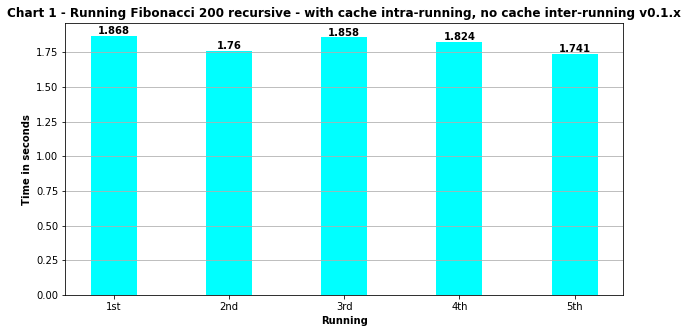

In [10]:
import matplotlib.pyplot as plt

f1 = open("output1.dat", "r")
data1 = []
dataf1 = []
for x in f1.readlines()[1::2]:
  data1.append(float(x))
f1.close()
print(data1)
for datas1 in data1:
  dataf1.append(round(datas1, 3))

running1 = ['1st', '2nd', '3rd', '4th', '5th']

plt.figure(figsize = (10, 5))
plt.bar(running1, dataf1, color ='cyan', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf1):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 1 - Running Fibonacci 200 recursive - with cache intra-running, no cache inter-running v0.1.x", fontweight='bold')
plt.savefig('chart1_v0.1.x.png')
plt.show()

#### **1.2 Fibonacci 200 recursive, <u>with inter and intra-cache</u>**

- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [11]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output2.dat
print("First running in sec (infra and cache construction, slow execution)")
!python test_fib_rec_v01xx.py 200 | tee -a output2.dat
print("---------------------------------")
print("Second running in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output2.dat
print("---------------------------------")
print("Third running in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output2.dat
print("---------------------------------")
print("Fourth running in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output2.dat
print("---------------------------------")
print("Fifth running in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output2.dat
print("---------------------------------")
print("Sixth running in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output2.dat

print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf fib_200_w_cache_profile_2.dat
print("Running with cache and profiling")
!python -m cProfile -s time test_fib_rec_v01xx.py 200 > fib_200_w_cache_profile_2.dat && head -n 17 fib_200_w_cache_profile_2.dat

---------------------------------
Cleaning up cache
First running in sec (infra and cache construction, slow execution)
2.8057117299251016e+41
1.8738589820000016
---------------------------------
Second running in sec
2.8057117299251016e+41
0.00524300300000391
---------------------------------
Third running in sec
2.8057117299251016e+41
0.005554966000005379
---------------------------------
Fourth running in sec
2.8057117299251016e+41
0.006906153000002746
---------------------------------
Fifth running in sec
2.8057117299251016e+41
0.008605795999997667
---------------------------------
Sixth running in sec
2.8057117299251016e+41
0.00543168600000854
---------------------------------
Cleaning up cache
Running with cache and profiling
2.8057117299251016e+41
1.9571040989999915
         351289 function calls (349243 primitive calls) in 1.977 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      201    1.489    0.007    1.489    

[1.8738589820000016, 0.00524300300000391, 0.005554966000005379, 0.006906153000002746, 0.008605795999997667, 0.00543168600000854]


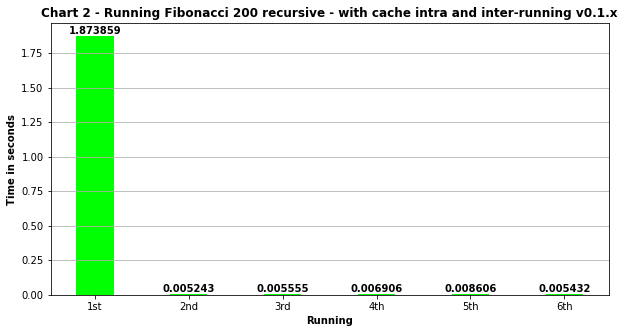

In [12]:
f2 = open("output2.dat", "r")
data2 = []
dataf2 = []
for x in f2.readlines()[1::2]:
  data2.append(float(x))
f2.close()
print(data2)
for datas2 in data2:
  dataf2.append(round(datas2, 6))

running2 = ['1st', '2nd', '3rd', '4th', '5th', '6th']

plt.figure(figsize = (10, 5))
plt.bar(running2, dataf2, color ='lime', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf2):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 2 - Running Fibonacci 200 recursive - with cache intra and inter-running v0.1.x", fontweight='bold')
plt.savefig('chart2_v0.1.x.png')
plt.show()

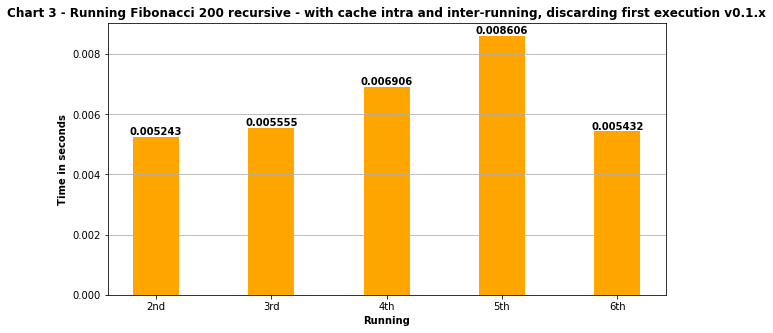

---------------------------------
---------------------------------
Statistics evaluation:
Execution time of each trial, in seconds
[0.00524300300000391, 0.005554966000005379, 0.006906153000002746, 0.008605795999997667, 0.00543168600000854]
Max: 0.008605795999997667
Min: 0.00524300300000391
Mean: 0.006348320800003649
Median: 0.005554966000005379
Standard deviation: 0.0014229133561273592
Variance: 2.0246824190456247e-06


In [13]:
data3 = data2[1::]
dataf3 = dataf2[1::]
running3 = running2[1::]

plt.figure(figsize = (10, 5))
plt.bar(running3, dataf3, color ='orange', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf3):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 3 - Running Fibonacci 200 recursive - with cache intra and inter-running, discarding first execution v0.1.x", fontweight='bold')
plt.savefig('chart3_v0.1.x.png')
plt.show()

print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
f3 = open("output3.dat", "w")
f3.write("\n")
#print(data)

for y in data3:
  f3.write(str(y)+"\n\n")

f3.close()
print("Execution time of each trial, in seconds")
!python stats_colab.py output3.dat

- Profiling the first execution to investigate the delay through running.

In [14]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf fib_200_w_cache_profile.dat
print("Running with cache and profiling")
!python -m cProfile -s time test_fib_rec.py 200 > fib_200_w_cache_profile.dat && head -n 17 fib_200_w_cache_profile.dat

---------------------------------
Cleaning up cache
Running with cache and profiling
2.8057117299251016e+41
1.9784082580000018
         348295 function calls (346249 primitive calls) in 1.999 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      201    1.500    0.007    1.500    0.007 {method 'commit' of 'sqlite3.Connection' objects}
      601    0.086    0.000    0.086    0.000 {method 'execute' of 'sqlite3.Connection' objects}
    24600    0.068    0.000    0.187    0.000 tokenize.py:487(_tokenize)
    21105    0.039    0.000    0.039    0.000 {method 'match' of 're.Pattern' objects}
      601    0.036    0.000    0.036    0.000 {built-in method _sqlite3.connect}
    21104    0.023    0.000    0.050    0.000 re.py:273(_compile)
      600    0.023    0.000    0.227    0.000 inspect.py:935(getblock)
      400    0.016    0.000    0.016    0.000 {built-in method io.open}
    24000    0.016    0.000    0.016    0.000 inspect.

#### **1.3 Fibonacci 200, 100 and 50 recursive, three mixed trials**

- Evaluating recursive fibonacci code, input 200, 100, and 50, three trials and plot.
- First trial: input 200, 100, and 50, no inter-cache (baseline).
- Second trial: input 200, 100, and 50, with intra and inter-cache, analyzing the cache's behavior with different inputs.
- Third trial: input 50, 100, and 200, with intra and inter-cache, analyzing the cache's behavior with different inputs, in a different order of the previous running.

In [15]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output4.dat
print("First running, Fibonacci 200: value and time in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output4.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running, Fibonacci 100: value and time in sec")
!python test_fib_rec_v01xx.py 100 | tee -a output4.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running, Fibonacci 50: value and time in sec")
!python test_fib_rec_v01xx.py 50 | tee -a output4.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Fibonacci 200: value and time in sec
2.8057117299251016e+41
1.7931664729999994
---------------------------------
Cleaning up cache
Second running, Fibonacci 100: value and time in sec
3.54224848179262e+20
0.8650127579999918
---------------------------------
Cleaning up cache
Third running, Fibonacci 50: value and time in sec
12586269025.0
0.4610688700000054
---------------------------------


- Second trial: with inter and intra-cache, inputs: 200, 100 and 50.

In [16]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("First running, Fibonacci 200: value and time in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output4.dat
print("---------------------------------")
print("Second running, Fibonacci 100: value and time in sec")
!python test_fib_rec_v01xx.py 100 | tee -a output4.dat
print("---------------------------------")
print("Third running, Fibonacci 50: value and time in sec")
!python test_fib_rec_v01xx.py 50 | tee -a output4.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Fibonacci 200: value and time in sec
2.8057117299251016e+41
1.8101112880000017
---------------------------------
Second running, Fibonacci 100: value and time in sec
3.54224848179262e+20
0.005412436999989723
---------------------------------
Third running, Fibonacci 50: value and time in sec
12586269025.0
0.005376490000003287
---------------------------------


- Third trial: with inter and intra-cache, inputs: 50, 100 and 200.

In [17]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("First running, Fibonacci 50: value and time in sec")
!python test_fib_rec_v01xx.py 50 | tee -a output4.dat
print("---------------------------------")
print("Second running, Fibonacci 100: value and time in sec")
!python test_fib_rec_v01xx.py 100 | tee -a output4.dat
print("---------------------------------")
print("Third running, Fibonacci 200: value and time in sec")
!python test_fib_rec_v01xx.py 200 | tee -a output4.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Fibonacci 50: value and time in sec
12586269025.0
0.4751674989999941
---------------------------------
Second running, Fibonacci 100: value and time in sec
3.54224848179262e+20
0.4769744609999975
---------------------------------
Third running, Fibonacci 200: value and time in sec
2.8057117299251016e+41
0.9217639829999911
---------------------------------


In [18]:
!ls -a
print("---------------------------------")
!cat output4.dat

.			       .git	    output3.dat
..			       .gitignore   output4.dat
chart1_v0.1.x.png	       intpy	    README.md
chart2_v0.1.x.png	       .intpy	    stats_colab.py
chart3_v0.1.x.png	       LICENSE	    test_fib_rec.py
fib_200_w_cache_profile_2.dat  output1.dat  test_fib_rec_v01xx.py
fib_200_w_cache_profile.dat    output2.dat
---------------------------------
2.8057117299251016e+41
1.7931664729999994
3.54224848179262e+20
0.8650127579999918
12586269025.0
0.4610688700000054
2.8057117299251016e+41
1.8101112880000017
3.54224848179262e+20
0.005412436999989723
12586269025.0
0.005376490000003287
12586269025.0
0.4751674989999941
3.54224848179262e+20
0.4769744609999975
2.8057117299251016e+41
0.9217639829999911


- Plotting the comparison: first graph.

[1.793166, 0.865013, 0.461069, 1.810111, 0.005412, 0.005376, 0.475167, 0.476974, 0.921764]
[1.793166, 1.810111, 0.921764]
[0.865013, 0.005412, 0.476974]
[0.461069, 0.005376, 0.475167]


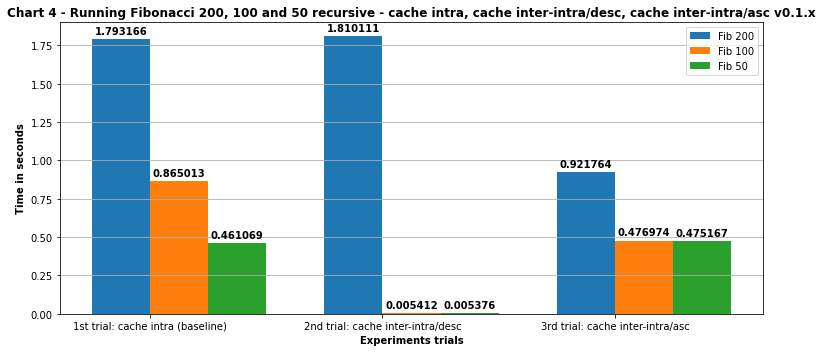

In [19]:
import numpy as np

f4 = open("output4.dat", "r") 
fib200 = []
fib100 = []
fib50 = []
data4 = []
dataf4 = []
for x in f4.readlines()[1::2]:
  data4.append(float(x))
f4.close()
#print(data4)
for datas4 in data4:
  dataf4.append(round(datas4, 6))

print(dataf4)

fib200 = [dataf4[0], dataf4[3], dataf4[8]]
print(fib200)

fib100 = [dataf4[1], dataf4[4], dataf4[7]]
print(fib100)

fib50 = [dataf4[2], dataf4[5], dataf4[6]]
print(fib50)

running3to5 = ['1st trial: cache intra (baseline)', '2nd trial: cache inter-intra/desc', '3rd trial: cache inter-intra/asc']

y = np.arange(len(running3to5))
width = 0.25

fig, ax = plt.subplots(figsize = (12, 5))
rects1 = ax.bar(y - width/2, fib200, width, label='Fib 200')
rects2 = ax.bar(y + width/2, fib100, width, label='Fib 100')
rects3 = ax.bar(y + width*1.5, fib50, width, label='Fib 50')

ax.set_ylabel("Time in seconds", fontweight='bold')
ax.set_xlabel("Experiments trials", fontweight='bold')
ax.set_title("Chart 4 - Running Fibonacci 200, 100 and 50 recursive - cache intra, cache inter-intra/desc, cache inter-intra/asc v0.1.x", fontweight='bold')
ax.set_xticks(y)
ax.set_xticklabels(running3to5)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    weight='bold',
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.grid(axis='y')

fig.tight_layout()
plt.savefig('chart4_v0.1.x.png')
plt.show()

- Plotting the comparison: second graph.

[1.793166, 0.865013, 0.461069, 1.810111, 0.005412, 0.005376, 0.475167, 0.476974, 0.921764]
[1.793166, 1.810111, 0.921764]
[0.865013, 0.005412, 0.476974]
[0.461069, 0.005376, 0.475167]


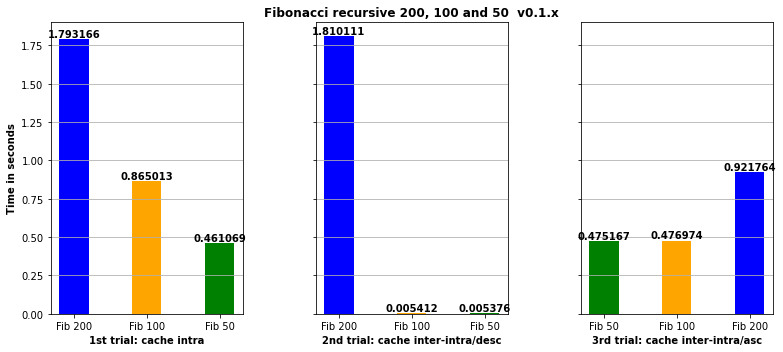

In [20]:
import numpy as np

f4 = open("output4.dat", "r")
fib200 = []
fib100 = []
fib50 = []
data4 = []
dataf4 = []
for x in f4.readlines()[1::2]:
  data4.append(float(x))
f4.close()

for datas4 in data4:
  dataf4.append(round(datas4, 6))

print(dataf4)

fib200 = [dataf4[0], dataf4[3], dataf4[8]]
print(fib200)

fib100 = [dataf4[1], dataf4[4], dataf4[7]]
print(fib100)

fib50 = [dataf4[2], dataf4[5], dataf4[6]]
print(fib50)

running3to5 = ['1st trial: cache intra', '2nd trial: cache inter-intra/desc', '3rd trial: cache inter-intra/asc']

y = np.arange(len(running3to5))
width = 0.40

z = ['Fib 200', 'Fib 100', 'Fib 50']
list_color_z = ['blue', 'orange', 'green']

zr = ['Fib 50', 'Fib 100', 'Fib 200']
list_color_zr = ['green', 'orange', 'blue']

t1=[dataf4[0], dataf4[1], dataf4[2]]
t2=[dataf4[3], dataf4[4], dataf4[5]]
t3=[dataf4[6], dataf4[7], dataf4[8]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,5))
rects1 = ax1.bar(z, t1,width, label='1st trial', color=list_color_z)
rects2 = ax2.bar(z, t2, width, label='2nd trial', color=list_color_z)
rects3 = ax3.bar(zr, t3, width, label='3rd trial', color=list_color_zr)

ax1.set_ylabel('Time in seconds', fontweight='bold')
ax1.set_xlabel('1st trial: cache intra', fontweight='bold')
ax2.set_xlabel('2nd trial: cache inter-intra/desc', fontweight='bold')
ax3.set_xlabel('3rd trial: cache inter-intra/asc', fontweight='bold')

ax2.set_title('Fibonacci recursive 200, 100 and 50  v0.1.x', fontweight='bold')

for index, datas in enumerate(t1):
  ax1.text(x=index, y=datas, s=t1[index], ha = 'center', va = 'bottom', fontweight='bold')

for index, datas in enumerate(t2):
  ax2.text(x=index, y=datas, s=t2[index], ha = 'center', va = 'bottom', fontweight='bold')

for index, datas in enumerate(t3):
  ax3.text(x=index, y=datas, s=t3[index], ha = 'center', va = 'bottom', fontweight='bold')

ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')

fig.tight_layout()
plt.savefig('chart5_v0.1.x.png')
plt.show()

In [21]:
!ls -a

.			       intpy
..			       .intpy
chart1_v0.1.x.png	       LICENSE
chart2_v0.1.x.png	       output1.dat
chart3_v0.1.x.png	       output2.dat
chart4_v0.1.x.png	       output3.dat
chart5_v0.1.x.png	       output4.dat
fib_200_w_cache_profile_2.dat  README.md
fib_200_w_cache_profile.dat    stats_colab.py
.git			       test_fib_rec.py
.gitignore		       test_fib_rec_v01xx.py


###**2. Starting v0.2.x evaluation scripts:**

#### **2.0 IntPy's improvements on the persistence architecture**

#### **2.1 First implementation of in-memory persistence (v0.2.1.x)** 
- New data is added to the dictionary only when cache miss occur and the function decorated with @deterministic is executed.

In [22]:
!git checkout v0.2.1.x

Branch 'v0.2.1.x' set up to track remote branch 'v0.2.1.x' from 'origin'.
Switched to a new branch 'v0.2.1.x'


In [23]:
!git branch

  main
  v0.1.x
* v0.2.1.x


In [24]:
# Downloading Fibonacci script up to date to v0.2.x branch
!wget https://raw.githubusercontent.com/claytonchagas/intpy_dev/main/test_fib_rec_v02xx.py

--2021-05-31 06:59:44--  https://raw.githubusercontent.com/claytonchagas/intpy_dev/main/test_fib_rec_v02xx.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328 [text/plain]
Saving to: ‘test_fib_rec_v02xx.py’

test_fib_rec_v02xx. 100%[===================>]     328  --.-KB/s    in 0s      

2021-05-31 06:59:44 (23.4 MB/s) - ‘test_fib_rec_v02xx.py’ saved [328/328]



##### **2.1.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.1.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot.

In [25]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
# !rm -rf .intpy chart* output* *v01xx.py *.dat
!rm -rf .intpy/
print("First running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output211.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output211.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output211.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fourth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output211.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fifth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output211.dat
print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
!python stats_colab.py output211.dat

.			       .intpy
..			       LICENSE
chart1_v0.1.x.png	       obs.md
chart2_v0.1.x.png	       output1.dat
chart3_v0.1.x.png	       output2.dat
chart4_v0.1.x.png	       output3.dat
chart5_v0.1.x.png	       output4.dat
fib_200_w_cache_profile_2.dat  README.md
fib_200_w_cache_profile.dat    stats_colab.py
.git			       test_fib_rec.py
.gitignore		       test_fib_rec_v01xx.py
intpy			       test_fib_rec_v02xx.py
---------------------------------
Cleaning up cache
First running: value and time in sec
2.8057117299251016e+41
0.17667086299999823
---------------------------------
Cleaning up cache
Second running: value and time in sec
2.8057117299251016e+41
0.1989224420000113
---------------------------------
Cleaning up cache
Third running: value and time in sec
2.8057117299251016e+41
0.16888601300000516
---------------------------------
Cleaning up cache
Fourth running: value and time in sec
2.8057117299251016e+41
0.17386153200000365
---------------------------------
Cleaning up cache
Fifth 

[0.17667086299999823, 0.1989224420000113, 0.16888601300000516, 0.17386153200000365, 0.1857164279999921]


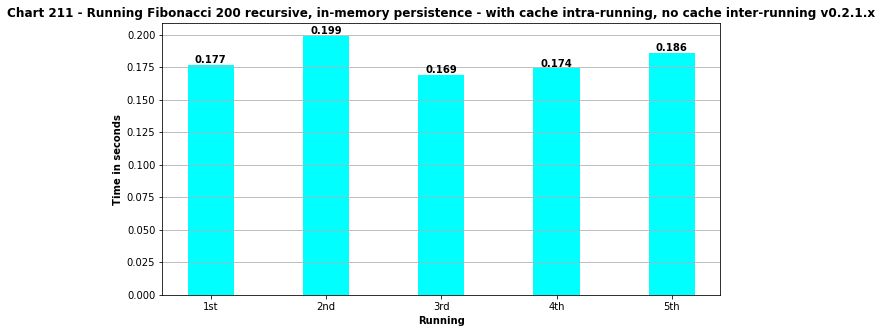

In [26]:
import matplotlib.pyplot as plt

f211 = open("output211.dat", "r")
data211 = []
dataf211 = []
for x in f211.readlines()[1::2]:
  data211.append(float(x))
f211.close()
print(data211)
for datas211 in data211:
  dataf211.append(round(datas211, 3))

running211 = ['1st', '2nd', '3rd', '4th', '5th']

plt.figure(figsize = (10, 5))
plt.bar(running211, dataf211, color ='cyan', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf211):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 211 - Running Fibonacci 200 recursive, in-memory persistence - with cache intra-running, no cache inter-running v0.2.1.x", fontweight='bold')
plt.savefig('chart211_v0.2.1.x.png')
plt.show()

##### **2.1.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.1.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [27]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output212.dat
print("First running in sec (infra and cache construction, slow execution)")
!python test_fib_rec_v02xx.py 200 | tee -a output212.dat
print("---------------------------------")
print("Second running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output212.dat
print("---------------------------------")
print("Third running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output212.dat
print("--------------------------------")
print("Fourth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output212.dat
print("---------------------------------")
print("Fifth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output212.dat
print("---------------------------------")
print("Sixth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output212.dat

print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf fib_200_w_cache_profile_212.dat
print("Running with cache and profiling")
!python -m cProfile -s time test_fib_rec_v02xx.py 200 > fib_200_w_cache_profile_212.dat && head -n 17 fib_200_w_cache_profile_212.dat

---------------------------------
Cleaning up cache
First running in sec (infra and cache construction, slow execution)
2.8057117299251016e+41
0.1952321109999957
---------------------------------
Second running in sec
2.8057117299251016e+41
0.005051803999990057
---------------------------------
Third running in sec
2.8057117299251016e+41
0.005199114000006944
--------------------------------
Fourth running in sec
2.8057117299251016e+41
0.005507000999998013
---------------------------------
Fifth running in sec
2.8057117299251016e+41
0.005416468999996482
---------------------------------
Sixth running in sec
2.8057117299251016e+41
0.005205349000007686
---------------------------------
Cleaning up cache
Running with cache and profiling
2.8057117299251016e+41
0.2842227539999982
         372122 function calls (370069 primitive calls) in 0.315 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25200    0.063    0.000    0.172   

[0.1952321109999957, 0.005051803999990057, 0.005199114000006944, 0.005507000999998013, 0.005416468999996482, 0.005205349000007686]


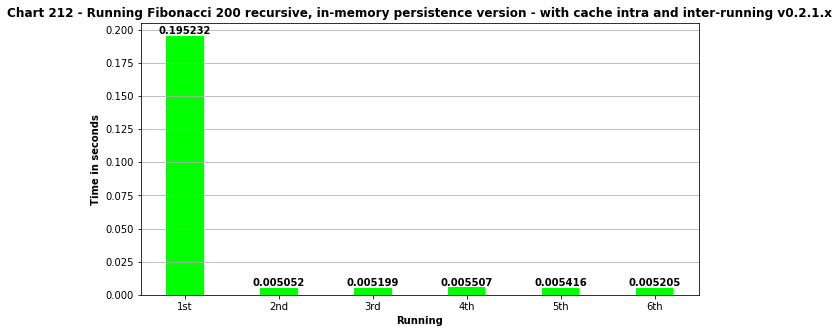

In [28]:
f212 = open("output212.dat", "r")
data212 = []
dataf212 = []
for x in f212.readlines()[1::2]:
  data212.append(float(x))
f212.close()
print(data212)
for datas212 in data212:
  dataf212.append(round(datas212, 6))

running212 = ['1st', '2nd', '3rd', '4th', '5th', '6th']

plt.figure(figsize = (10, 5))
plt.bar(running212, dataf212, color ='lime', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf212):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 212 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running v0.2.1.x", fontweight='bold')
plt.savefig('chart212_v0.2.1.x.png')
plt.show()

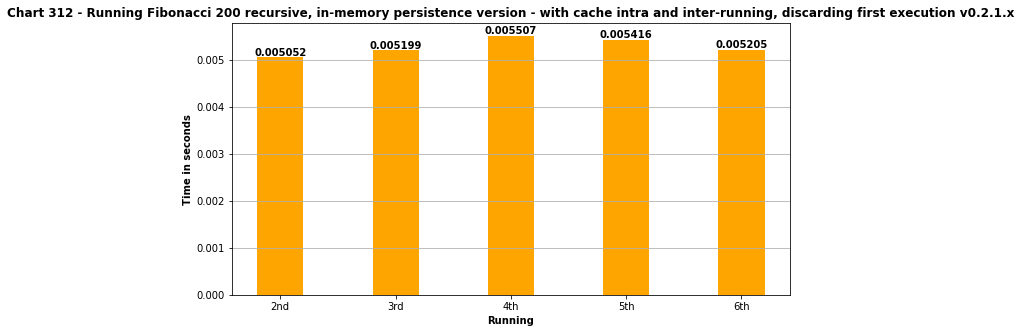

---------------------------------
---------------------------------
Statistics evaluation:
Execution time of each trial, in seconds
[0.005051803999990057, 0.005199114000006944, 0.005507000999998013, 0.005416468999996482, 0.005205349000007686]
Max: 0.005507000999998013
Min: 0.005051803999990057
Mean: 0.005275947399999837
Median: 0.005205349000007686
Standard deviation: 0.00018320743389775313
Variance: 3.356496383539958e-08


In [29]:
data312 = data212[1::]
dataf312 = dataf212[1::]
running312 = running212[1::]

plt.figure(figsize = (10, 5))
plt.bar(running312, dataf312, color ='orange', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf312):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 312 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running, discarding first execution v0.2.1.x", fontweight='bold')
plt.savefig('chart312_v0.2.1.x.png')
plt.show()

print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
f312 = open("output312.dat", "w")
f312.write("\n")
#print(data)

for y in data312:
  f312.write(str(y)+"\n\n")

f312.close()
print("Execution time of each trial, in seconds")
!python stats_colab.py output312.dat

#### **2.2 Second implementation of in-memory persistence (v0.2.2.x)** 
- At the begining of the execution all the data cached is loaded to the dictonary before the user script starts to run (uses 1 dictionary).

In [30]:
!git checkout v0.2.2.x

Branch 'v0.2.2.x' set up to track remote branch 'v0.2.2.x' from 'origin'.
Switched to a new branch 'v0.2.2.x'


In [31]:
!git branch

  main
  v0.1.x
  v0.2.1.x
* v0.2.2.x


##### **2.2.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.2.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [32]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy/
print("First running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output221.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output221.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output221.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fourth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output221.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fifth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output221.dat
print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
!python stats_colab.py output221.dat

.				 .intpy
..				 LICENSE
chart1_v0.1.x.png		 obs.md
chart211_v0.2.1.x.png		 output1.dat
chart212_v0.2.1.x.png		 output211.dat
chart2_v0.1.x.png		 output212.dat
chart312_v0.2.1.x.png		 output2.dat
chart3_v0.1.x.png		 output312.dat
chart4_v0.1.x.png		 output3.dat
chart5_v0.1.x.png		 output4.dat
fib_200_w_cache_profile_212.dat  README.md
fib_200_w_cache_profile_2.dat	 stats_colab.py
fib_200_w_cache_profile.dat	 test_fib_rec.py
.git				 test_fib_rec_v01xx.py
.gitignore			 test_fib_rec_v02xx.py
intpy
---------------------------------
Cleaning up cache
First running: value and time in sec
2.8057117299251016e+41
0.18021064000001275
---------------------------------
Cleaning up cache
Second running: value and time in sec
2.8057117299251016e+41
0.17013602500000502
---------------------------------
Cleaning up cache
Third running: value and time in sec
2.8057117299251016e+41
0.17284301899999832
---------------------------------
Cleaning up cache
Fourth running: value and time in sec
2.8057117

[0.18021064000001275, 0.17013602500000502, 0.17284301899999832, 0.1722170580000011, 0.16147513800000013]


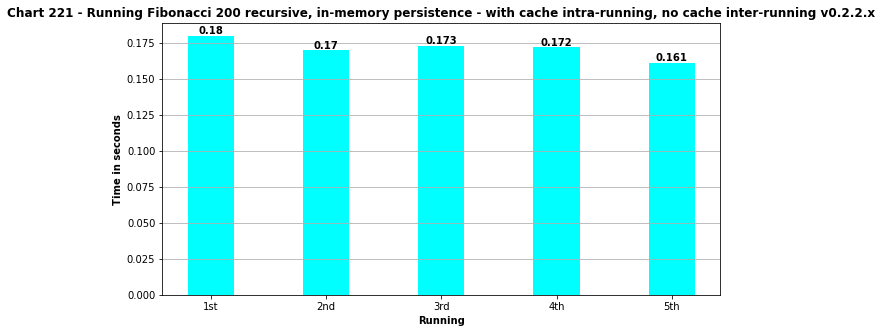

In [33]:
import matplotlib.pyplot as plt

f221 = open("output221.dat", "r")
data221 = []
dataf221 = []
for x in f221.readlines()[1::2]:
  data221.append(float(x))
f221.close()
print(data221)
for datas221 in data221:
  dataf221.append(round(datas221, 3))

running211 = ['1st', '2nd', '3rd', '4th', '5th']

plt.figure(figsize = (10, 5))
plt.bar(running211, dataf221, color ='cyan', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf221):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 221 - Running Fibonacci 200 recursive, in-memory persistence - with cache intra-running, no cache inter-running v0.2.2.x", fontweight='bold')
plt.savefig('chart221_v0.2.2.x.png')
plt.show()

##### **2.2.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.2.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [34]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output222.dat
print("First running in sec (infra and cache construction, slow execution)")
!python test_fib_rec_v02xx.py 200 | tee -a output222.dat
print("---------------------------------")
print("Second running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output222.dat
print("---------------------------------")
print("Third running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output222.dat
print("--------------------------------")
print("Fourth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output222.dat
print("---------------------------------")
print("Fifth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output222.dat
print("---------------------------------")
print("Sixth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output222.dat

print("---------------------------------")
print("Cleaning up cache")
#!rm -rf .intpy
!rm -rf fib_200_w_cache_profile_222.dat
print("Running with cache and profiling")
!python -m cProfile -s time test_fib_rec_v02xx.py 200 > fib_200_w_cache_profile_222.dat && head -n 17 fib_200_w_cache_profile_222.dat

---------------------------------
Cleaning up cache
First running in sec (infra and cache construction, slow execution)
2.8057117299251016e+41
0.16767364599999723
---------------------------------
Second running in sec
2.8057117299251016e+41
0.03900844899999356
---------------------------------
Third running in sec
2.8057117299251016e+41
0.041470856000003664
--------------------------------
Fourth running in sec
2.8057117299251016e+41
0.0411053910000021
---------------------------------
Fifth running in sec
2.8057117299251016e+41
0.0342569860000026
---------------------------------
Sixth running in sec
2.8057117299251016e+41
0.03653246300000035
---------------------------------
Cleaning up cache
Running with cache and profiling
2.8057117299251016e+41
0.04234935600000256
         29806 function calls (28550 primitive calls) in 0.067 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.010    0.010    0.010    0.010

[0.16767364599999723, 0.03900844899999356, 0.041470856000003664, 0.0411053910000021, 0.0342569860000026, 0.03653246300000035]


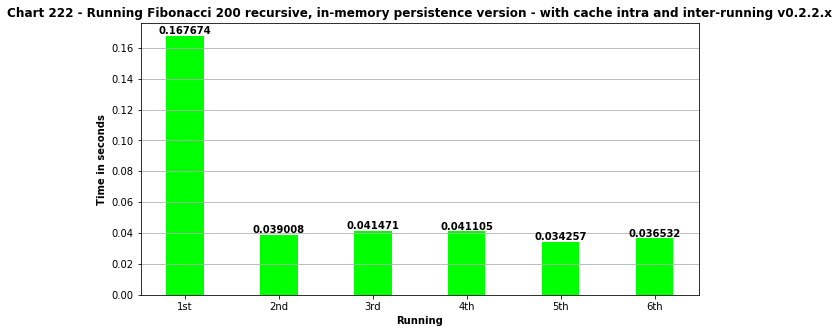

In [35]:
f222 = open("output222.dat", "r")
data222 = []
dataf222 = []
for x in f222.readlines()[1::2]:
  data222.append(float(x))
f222.close()
print(data222)
for datas222 in data222:
  dataf222.append(round(datas222, 6))

running222 = ['1st', '2nd', '3rd', '4th', '5th', '6th']

plt.figure(figsize = (10, 5))
plt.bar(running222, dataf222, color ='lime', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf222):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 222 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running v0.2.2.x", fontweight='bold')
plt.savefig('chart222_v0.2.2.x.png')
plt.show()

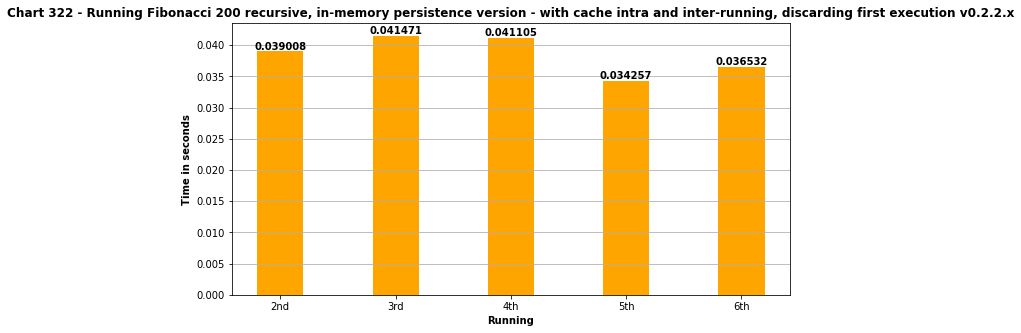

---------------------------------
---------------------------------
Statistics evaluation:
Execution time of each trial, in seconds
[0.03900844899999356, 0.041470856000003664, 0.0411053910000021, 0.0342569860000026, 0.03653246300000035]
Max: 0.041470856000003664
Min: 0.0342569860000026
Mean: 0.03847482900000045
Median: 0.03900844899999356
Standard deviation: 0.0030717979171643464
Variance: 9.435942443895216e-06


In [36]:
data322 = data222[1::]
dataf322 = dataf222[1::]
running322 = running222[1::]

plt.figure(figsize = (10, 5))
plt.bar(running322, dataf322, color ='orange', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf322):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 322 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running, discarding first execution v0.2.2.x", fontweight='bold')
plt.savefig('chart322_v0.2.2.x.png')
plt.show()

print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
f322 = open("output322.dat", "w")
f322.write("\n")
#print(data)

for y in data322:
  f322.write(str(y)+"\n\n")

f322.close()
print("Execution time of each trial, in seconds")
!python stats_colab.py output322.dat

#### **2.3 Third implementation of in-memory persistence (v0.2.3.x)** 
- At the begining of the execution all the data cached is loaded to the dictionary CACHED_DATA_DICTIONARY before the user script starts to run. When cache miss occurs and a function decorated with @deterministic is processed, its result is stored in NEW_DATA_DICTIONARY. This way, only the elements of NEW_DATA_DICTIONARY are added to the database at the end of the execution (uses 2 dictionaries).

In [37]:
!git checkout v0.2.3.x

Branch 'v0.2.3.x' set up to track remote branch 'v0.2.3.x' from 'origin'.
Switched to a new branch 'v0.2.3.x'


In [38]:
!git branch

  main
  v0.1.x
  v0.2.1.x
  v0.2.2.x
* v0.2.3.x


##### **2.3.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.3.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [39]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy/
print("First running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output231.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output231.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output231.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fourth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output231.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fifth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output231.dat
print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
!python stats_colab.py output231.dat

.		       fib_200_w_cache_profile_212.dat	output221.dat
..		       fib_200_w_cache_profile_222.dat	output222.dat
chart1_v0.1.x.png      fib_200_w_cache_profile_2.dat	output2.dat
chart211_v0.2.1.x.png  fib_200_w_cache_profile.dat	output312.dat
chart212_v0.2.1.x.png  .git				output322.dat
chart221_v0.2.2.x.png  .gitignore			output3.dat
chart222_v0.2.2.x.png  intpy				output4.dat
chart2_v0.1.x.png      .intpy				README.md
chart312_v0.2.1.x.png  LICENSE				stats_colab.py
chart322_v0.2.2.x.png  obs.md				test_fib_rec.py
chart3_v0.1.x.png      output1.dat			test_fib_rec_v01xx.py
chart4_v0.1.x.png      output211.dat			test_fib_rec_v02xx.py
chart5_v0.1.x.png      output212.dat
---------------------------------
Cleaning up cache
First running: value and time in sec
2.8057117299251016e+41
0.18226016100000209
---------------------------------
Cleaning up cache
Second running: value and time in sec
2.8057117299251016e+41
0.1682589650000068
---------------------------------
Cleaning up cache
Third 

[0.18226016100000209, 0.1682589650000068, 0.18414653100001033, 0.17676681399998984, 0.16850252700000112]


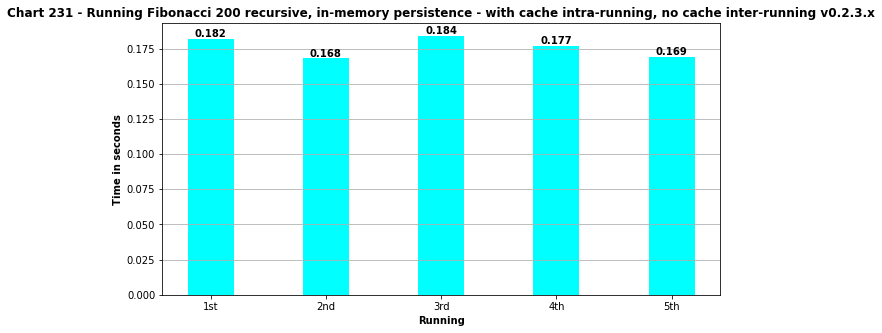

In [40]:
import matplotlib.pyplot as plt

f231 = open("output231.dat", "r")
data231 = []
dataf231 = []
for x in f231.readlines()[1::2]:
  data231.append(float(x))
f231.close()
print(data231)
for datas231 in data231:
  dataf231.append(round(datas231, 3))

running231 = ['1st', '2nd', '3rd', '4th', '5th']

plt.figure(figsize = (10, 5))
plt.bar(running231, dataf231, color ='cyan', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf231):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 231 - Running Fibonacci 200 recursive, in-memory persistence - with cache intra-running, no cache inter-running v0.2.3.x", fontweight='bold')
plt.savefig('chart231_v0.2.3.x.png')
plt.show()

##### **2.3.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.3.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [41]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output232.dat
print("First running in sec (infra and cache construction, slow execution)")
!python test_fib_rec_v02xx.py 200 | tee -a output232.dat
print("---------------------------------")
print("Second running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output232.dat
print("---------------------------------")
print("Third running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output232.dat
print("--------------------------------")
print("Fourth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output232.dat
print("---------------------------------")
print("Fifth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output232.dat
print("---------------------------------")
print("Sixth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output232.dat

print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf fib_200_w_cache_profile_232.dat
print("Running with cache and profiling")
!python -m cProfile -s time test_fib_rec_v02xx.py 200 > fib_200_w_cache_profile_232.dat && head -n 17 fib_200_w_cache_profile_232.dat

---------------------------------
Cleaning up cache
First running in sec (infra and cache construction, slow execution)
2.8057117299251016e+41
0.18253424699999243
---------------------------------
Second running in sec
2.8057117299251016e+41
0.004991317000005324
---------------------------------
Third running in sec
2.8057117299251016e+41
0.0057109669999988455
--------------------------------
Fourth running in sec
2.8057117299251016e+41
0.004794715000002725
---------------------------------
Fifth running in sec
2.8057117299251016e+41
0.004871731999998019
---------------------------------
Sixth running in sec
2.8057117299251016e+41
0.00477412900001184
---------------------------------
Cleaning up cache
Running with cache and profiling
2.8057117299251016e+41
0.2980827020000021
         370515 function calls (368461 primitive calls) in 0.329 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25200    0.067    0.000    0.186  

[0.18253424699999243, 0.004991317000005324, 0.0057109669999988455, 0.004794715000002725, 0.004871731999998019, 0.00477412900001184]


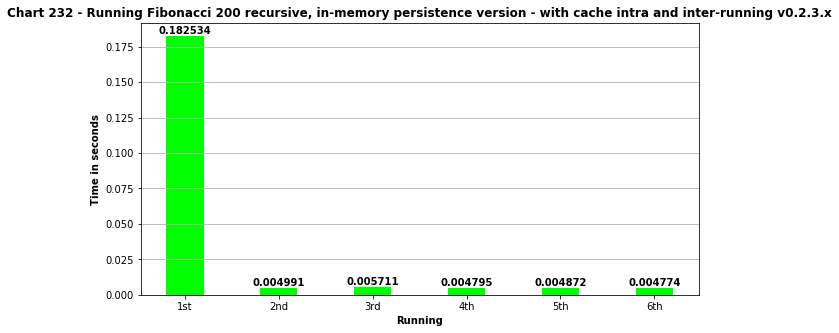

In [42]:
f232 = open("output232.dat", "r")
data232 = []
dataf232 = []
for x in f232.readlines()[1::2]:
  data232.append(float(x))
f232.close()
print(data232)
for datas232 in data232:
  dataf232.append(round(datas232, 6))

running232 = ['1st', '2nd', '3rd', '4th', '5th', '6th']

plt.figure(figsize = (10, 5))
plt.bar(running232, dataf232, color ='lime', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf232):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 232 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running v0.2.3.x", fontweight='bold')
plt.savefig('chart232_v0.2.3.x.png')
plt.show()

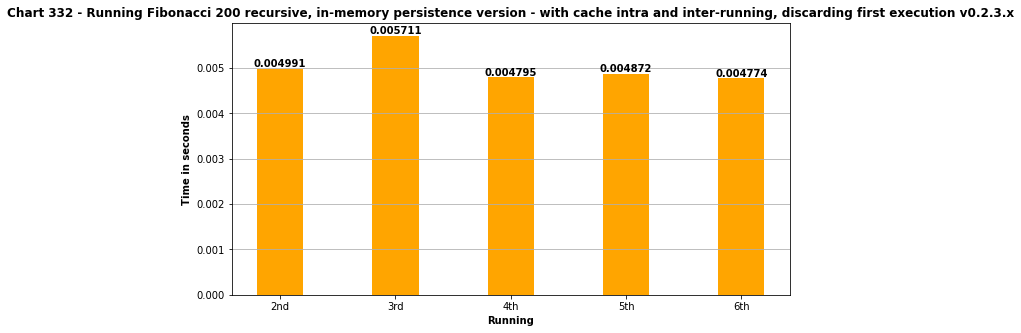

---------------------------------
---------------------------------
Statistics evaluation:
Execution time of each trial, in seconds
[0.004991317000005324, 0.0057109669999988455, 0.004794715000002725, 0.004871731999998019, 0.00477412900001184]
Max: 0.0057109669999988455
Min: 0.00477412900001184
Mean: 0.005028572000003351
Median: 0.004871731999998019
Standard deviation: 0.0003908580283617536
Variance: 1.5276999833483737e-07


In [43]:
data332 = data232[1::]
dataf332 = dataf232[1::]
running332 = running232[1::]

plt.figure(figsize = (10, 5))
plt.bar(running332, dataf332, color ='orange', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf332):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 332 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running, discarding first execution v0.2.3.x", fontweight='bold')
plt.savefig('chart332_v0.2.3.x.png')
plt.show()

print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
f332 = open("output332.dat", "w")
f332.write("\n")
#print(data)

for y in data332:
  f332.write(str(y)+"\n\n")

f332.close()
print("Execution time of each trial, in seconds")
!python stats_colab.py output332.dat

#### **2.4 Fourth implementation of in-memory persistence (v0.2.4.x)**
- At the begining of the execution a thread is started to load all the data cached in the database to the dictionary CACHED_DATA_DICTIONARY. When cache miss occurs and a function decorated with @deterministic is processed, its result is stored in NEW_DATA_DICTIONARY. Only the elements of NEW_DATA_DICTIONARY are added to the database at the end of the execution but it is possible that some elements in NEW_DATA_DICTIONARY are already in the database due to the concurrent execution of the experiment and the thread that populates CACHED_DATA_DICTIONARY. (uses 2 dictionaries).

In [44]:
!git checkout v0.2.4.x

Branch 'v0.2.4.x' set up to track remote branch 'v0.2.4.x' from 'origin'.
Switched to a new branch 'v0.2.4.x'


In [45]:
!git branch

  main
  v0.1.x
  v0.2.1.x
  v0.2.2.x
  v0.2.3.x
* v0.2.4.x


##### **2.4.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.4.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [46]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy/
print("First running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output241.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output241.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output241.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fourth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output241.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fifth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output241.dat
print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
!python stats_colab.py output241.dat

.		       chart5_v0.1.x.png		output221.dat
..		       fib_200_w_cache_profile_212.dat	output222.dat
chart1_v0.1.x.png      fib_200_w_cache_profile_222.dat	output231.dat
chart211_v0.2.1.x.png  fib_200_w_cache_profile_232.dat	output232.dat
chart212_v0.2.1.x.png  fib_200_w_cache_profile_2.dat	output2.dat
chart221_v0.2.2.x.png  fib_200_w_cache_profile.dat	output312.dat
chart222_v0.2.2.x.png  .git				output322.dat
chart231_v0.2.3.x.png  .gitignore			output332.dat
chart232_v0.2.3.x.png  intpy				output3.dat
chart2_v0.1.x.png      .intpy				output4.dat
chart312_v0.2.1.x.png  LICENSE				README.md
chart322_v0.2.2.x.png  obs.md				stats_colab.py
chart332_v0.2.3.x.png  output1.dat			test_fib_rec.py
chart3_v0.1.x.png      output211.dat			test_fib_rec_v01xx.py
chart4_v0.1.x.png      output212.dat			test_fib_rec_v02xx.py
---------------------------------
Cleaning up cache
First running: value and time in sec
2.8057117299251016e+41
0.17109244600000295
---------------------------------
Cleaning up cac

[0.17109244600000295, 0.1891049950000081, 0.1824487850000054, 0.17023392099999057, 0.16326772400000777]


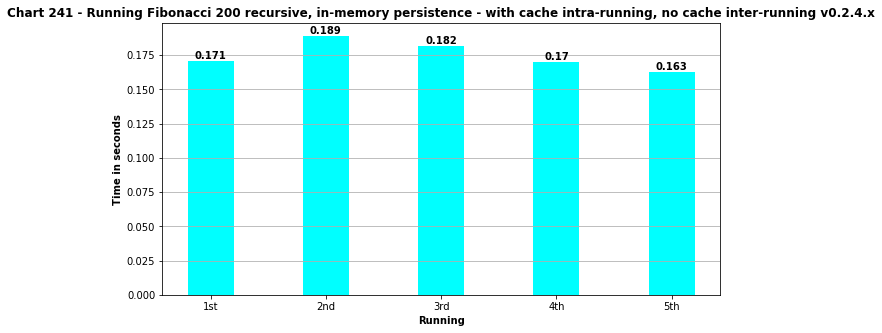

In [47]:
import matplotlib.pyplot as plt

f241 = open("output241.dat", "r")
data241 = []
dataf241 = []
for x in f241.readlines()[1::2]:
  data241.append(float(x))
f241.close()
print(data241)
for datas241 in data241:
  dataf241.append(round(datas241, 3))

running241 = ['1st', '2nd', '3rd', '4th', '5th']

plt.figure(figsize = (10, 5))
plt.bar(running241, dataf241, color ='cyan', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf241):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 241 - Running Fibonacci 200 recursive, in-memory persistence - with cache intra-running, no cache inter-running v0.2.4.x", fontweight='bold')
plt.savefig('chart241_v0.2.4.x.png')
plt.show()

##### **2.4.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.4.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [48]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output242.dat
print("First running in sec (infra and cache construction, slow execution)")
!python test_fib_rec_v02xx.py 200 | tee -a output242.dat
print("---------------------------------")
print("Second running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output242.dat
print("---------------------------------")
print("Third running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output242.dat
print("--------------------------------")
print("Fourth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output242.dat
print("---------------------------------")
print("Fifth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output242.dat
print("---------------------------------")
print("Sixth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output242.dat

print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf fib_200_w_cache_profile_242.dat
print("Running with cache and profiling")
!python -m cProfile -s time test_fib_rec_v02xx.py 200 > fib_200_w_cache_profile_242.dat && head -n 17 fib_200_w_cache_profile_242.dat

---------------------------------
Cleaning up cache
First running in sec (infra and cache construction, slow execution)
2.8057117299251016e+41
0.17775569500000188
---------------------------------
Second running in sec
2.8057117299251016e+41
0.20640724000000432
---------------------------------
Third running in sec
2.8057117299251016e+41
0.210247336000009
--------------------------------
Fourth running in sec
2.8057117299251016e+41
0.10920371999999645
---------------------------------
Fifth running in sec
2.8057117299251016e+41
0.21142000099999336
---------------------------------
Sixth running in sec
2.8057117299251016e+41
0.20053627000000063
---------------------------------
Cleaning up cache
Running with cache and profiling
2.8057117299251016e+41
0.2898332339999996
         376691 function calls (374625 primitive calls) in 0.323 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25200    0.064    0.000    0.177    0.000

[0.17775569500000188, 0.20640724000000432, 0.210247336000009, 0.10920371999999645, 0.21142000099999336, 0.20053627000000063]


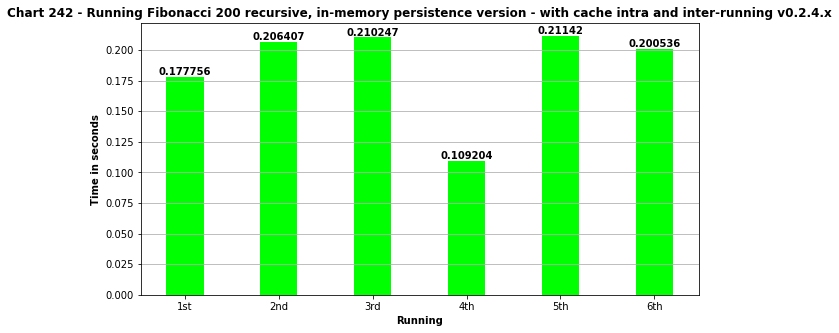

In [49]:
f242 = open("output242.dat", "r")
data242 = []
dataf242 = []
for x in f242.readlines()[1::2]:
  data242.append(float(x))
f242.close()
print(data242)
for datas242 in data242:
  dataf242.append(round(datas242, 6))

running242 = ['1st', '2nd', '3rd', '4th', '5th', '6th']

plt.figure(figsize = (10, 5))
plt.bar(running242, dataf242, color ='lime', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf242):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 242 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running v0.2.4.x", fontweight='bold')
plt.savefig('chart242_v0.2.4.x.png')
plt.show()

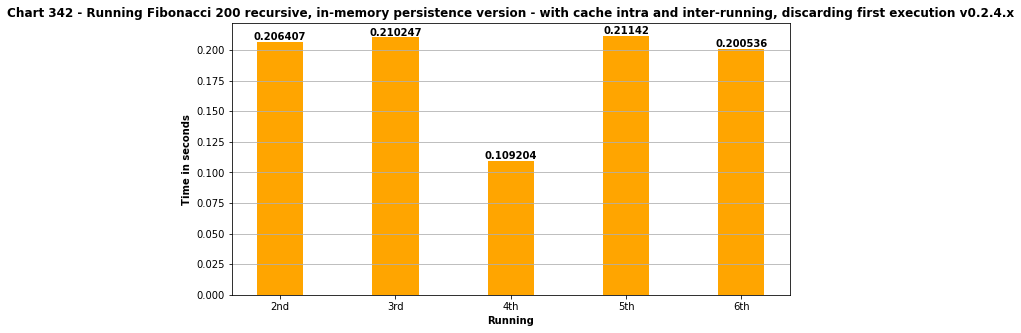

---------------------------------
---------------------------------
Statistics evaluation:
Execution time of each trial, in seconds
[0.20640724000000432, 0.210247336000009, 0.10920371999999645, 0.21142000099999336, 0.20053627000000063]
Max: 0.21142000099999336
Min: 0.10920371999999645
Mean: 0.18756291340000075
Median: 0.20640724000000432
Standard deviation: 0.044009440675345804
Variance: 0.0019368308685567815


In [50]:
data342 = data242[1::]
dataf342 = dataf242[1::]
running342 = running242[1::]

plt.figure(figsize = (10, 5))
plt.bar(running342, dataf342, color ='orange', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf342):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 342 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running, discarding first execution v0.2.4.x", fontweight='bold')
plt.savefig('chart342_v0.2.4.x.png')
plt.show()

print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
f342 = open("output342.dat", "w")
f342.write("\n")
#print(data)

for y in data342:
  f342.write(str(y)+"\n\n")

f342.close()
print("Execution time of each trial, in seconds")
!python stats_colab.py output342.dat

#### **2.5 Fifth implementation of in-memory persistence (v0.2.5.x)**
- When @deterministic is executed a select query is created to the database to bring all results of the function decorated with @deterministic stored in the cache. A list of functions already inserted to the dictionary is maintained to avoid unecessary querys to the database. The results are then stored in the dictionary CACHED_DATA_DICTIONARY. When cache miss occurs and a function decorated with @deterministic is processed, its result is stored in NEW_DATA_DICTIONARY. This way, only the elements of NEW_DATA_DICTIONARY are added to the database at the end of the execution. (uses 2 dictionaries).

In [51]:
!git checkout v0.2.5.x

Branch 'v0.2.5.x' set up to track remote branch 'v0.2.5.x' from 'origin'.
Switched to a new branch 'v0.2.5.x'


In [52]:
!git branch

  main
  v0.1.x
  v0.2.1.x
  v0.2.2.x
  v0.2.3.x
  v0.2.4.x
* v0.2.5.x


##### **2.5.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.5.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [53]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy/
print("First running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output251.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output251.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output251.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fourth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output251.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fifth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output251.dat
print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
!python stats_colab.py output251.dat

.		       chart5_v0.1.x.png		output231.dat
..		       fib_200_w_cache_profile_212.dat	output232.dat
chart1_v0.1.x.png      fib_200_w_cache_profile_222.dat	output241.dat
chart211_v0.2.1.x.png  fib_200_w_cache_profile_232.dat	output242.dat
chart212_v0.2.1.x.png  fib_200_w_cache_profile_242.dat	output2.dat
chart221_v0.2.2.x.png  fib_200_w_cache_profile_2.dat	output312.dat
chart222_v0.2.2.x.png  fib_200_w_cache_profile.dat	output322.dat
chart231_v0.2.3.x.png  .git				output332.dat
chart232_v0.2.3.x.png  .gitignore			output342.dat
chart241_v0.2.4.x.png  intpy				output3.dat
chart242_v0.2.4.x.png  .intpy				output4.dat
chart2_v0.1.x.png      LICENSE				README.md
chart312_v0.2.1.x.png  obs.md				stats_colab.py
chart322_v0.2.2.x.png  output1.dat			test_fib_rec.py
chart332_v0.2.3.x.png  output211.dat			test_fib_rec_v01xx.py
chart342_v0.2.4.x.png  output212.dat			test_fib_rec_v02xx.py
chart3_v0.1.x.png      output221.dat
chart4_v0.1.x.png      output222.dat
---------------------------------
Clea

[0.1733863270000029, 0.17521449599999528, 0.1659345319999943, 0.17260191800001223, 0.16448025700000812]


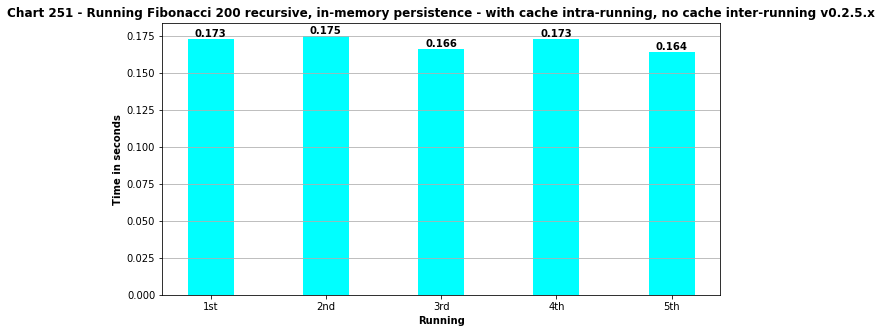

In [54]:
import matplotlib.pyplot as plt

f251 = open("output251.dat", "r")
data251 = []
dataf251 = []
for x in f251.readlines()[1::2]:
  data251.append(float(x))
f251.close()
print(data251)
for datas251 in data251:
  dataf251.append(round(datas251, 3))

running251 = ['1st', '2nd', '3rd', '4th', '5th']

plt.figure(figsize = (10, 5))
plt.bar(running251, dataf251, color ='cyan', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf251):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 251 - Running Fibonacci 200 recursive, in-memory persistence - with cache intra-running, no cache inter-running v0.2.5.x", fontweight='bold')
plt.savefig('chart251_v0.2.5.x.png')
plt.show()

##### **2.5.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.5.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [55]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output252.dat
print("First running in sec (infra and cache construction, slow execution)")
!python test_fib_rec_v02xx.py 200 | tee -a output252.dat
print("---------------------------------")
print("Second running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output252.dat
print("---------------------------------")
print("Third running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output252.dat
print("--------------------------------")
print("Fourth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output252.dat
print("---------------------------------")
print("Fifth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output252.dat
print("---------------------------------")
print("Sixth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output252.dat

print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf fib_200_w_cache_profile_252.dat
print("Running with cache and profiling")
!python -m cProfile -s time test_fib_rec_v02xx.py 200 > fib_200_w_cache_profile_252.dat && head -n 17 fib_200_w_cache_profile_252.dat

---------------------------------
Cleaning up cache
First running in sec (infra and cache construction, slow execution)
2.8057117299251016e+41
0.1860985229999983
---------------------------------
Second running in sec
2.8057117299251016e+41
0.008184726999999725
---------------------------------
Third running in sec
2.8057117299251016e+41
0.008121994999996218
--------------------------------
Fourth running in sec
2.8057117299251016e+41
0.007723304000009534
---------------------------------
Fifth running in sec
2.8057117299251016e+41
0.008126140999991094
---------------------------------
Sixth running in sec
2.8057117299251016e+41
0.00793325300000447
---------------------------------
Cleaning up cache
Running with cache and profiling
2.8057117299251016e+41
0.27450462200000914
         370515 function calls (368462 primitive calls) in 0.304 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25200    0.060    0.000    0.168   

[0.1860985229999983, 0.008184726999999725, 0.008121994999996218, 0.007723304000009534, 0.008126140999991094, 0.00793325300000447]


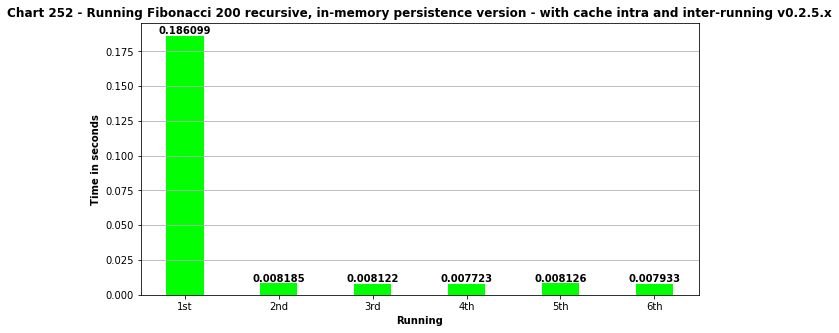

In [56]:
f252 = open("output252.dat", "r")
data252 = []
dataf252 = []
for x in f252.readlines()[1::2]:
  data252.append(float(x))
f252.close()
print(data252)
for datas252 in data252:
  dataf252.append(round(datas252, 6))

running252 = ['1st', '2nd', '3rd', '4th', '5th', '6th']

plt.figure(figsize = (10, 5))
plt.bar(running252, dataf252, color ='lime', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf252):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 252 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running v0.2.5.x", fontweight='bold')
plt.savefig('chart252_v0.2.5.x.png')
plt.show()

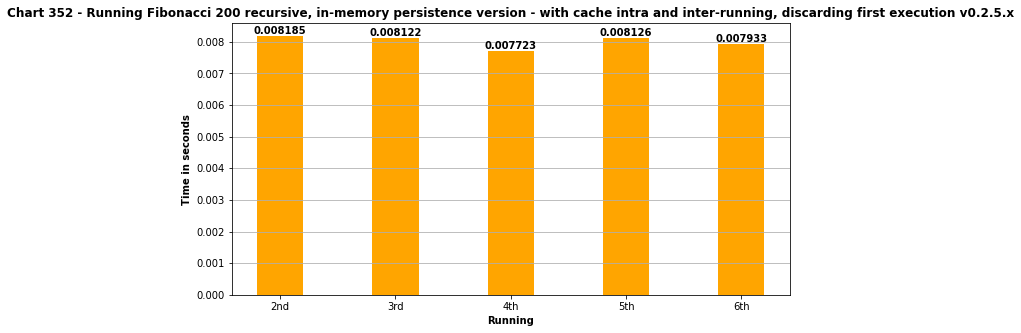

---------------------------------
---------------------------------
Statistics evaluation:
Execution time of each trial, in seconds
[0.008184726999999725, 0.008121994999996218, 0.007723304000009534, 0.008126140999991094, 0.00793325300000447]
Max: 0.008184726999999725
Min: 0.007723304000009534
Mean: 0.008017884000000208
Median: 0.008121994999996218
Standard deviation: 0.00018995726333232083
Variance: 3.608376189270468e-08


In [57]:
data352 = data252[1::]
dataf352 = dataf252[1::]
running352 = running252[1::]

plt.figure(figsize = (10, 5))
plt.bar(running352, dataf352, color ='orange', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf352):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 352 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running, discarding first execution v0.2.5.x", fontweight='bold')
plt.savefig('chart352_v0.2.5.x.png')
plt.show()

print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
f352 = open("output352.dat", "w")
f352.write("\n")
#print(data)

for y in data352:
  f352.write(str(y)+"\n\n")

f352.close()
print("Execution time of each trial, in seconds")
!python stats_colab.py output352.dat

#### **2.6 Fifth implementation of in-memory persistence (v0.2.6.x)**
- When @deterministic is executed a select query is created to the database to bring all results of the function decorated with @deterministic stored in the cache. A list of functions already inserted to the dictionary is maintained to avoid unecessary querys to the database. The results of the query are stored in the dictionary CACHED_DATA_DICTIONARY by a thread. When cache miss occurs and a function decorated with @deterministic is processed, its result is stored in NEW_DATA_DICTIONARY. This way, only the elements of NEW_DATA_DICTIONARY are added to the database at the end of the execution (uses 2 dictionaries).

In [58]:
!git checkout v0.2.6.x

Branch 'v0.2.6.x' set up to track remote branch 'v0.2.6.x' from 'origin'.
Switched to a new branch 'v0.2.6.x'


In [59]:
!git branch

  main
  v0.1.x
  v0.2.1.x
  v0.2.2.x
  v0.2.3.x
  v0.2.4.x
  v0.2.5.x
* v0.2.6.x


##### **2.6.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.6.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [60]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy/
print("First running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output261.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output261.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output261.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fourth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output261.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fifth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output261.dat
print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
!python stats_colab.py output261.dat

.		       chart4_v0.1.x.png		output231.dat
..		       chart5_v0.1.x.png		output232.dat
chart1_v0.1.x.png      fib_200_w_cache_profile_212.dat	output241.dat
chart211_v0.2.1.x.png  fib_200_w_cache_profile_222.dat	output242.dat
chart212_v0.2.1.x.png  fib_200_w_cache_profile_232.dat	output251.dat
chart221_v0.2.2.x.png  fib_200_w_cache_profile_242.dat	output252.dat
chart222_v0.2.2.x.png  fib_200_w_cache_profile_252.dat	output2.dat
chart231_v0.2.3.x.png  fib_200_w_cache_profile_2.dat	output312.dat
chart232_v0.2.3.x.png  fib_200_w_cache_profile.dat	output322.dat
chart241_v0.2.4.x.png  .git				output332.dat
chart242_v0.2.4.x.png  .gitignore			output342.dat
chart251_v0.2.5.x.png  intpy				output352.dat
chart252_v0.2.5.x.png  .intpy				output3.dat
chart2_v0.1.x.png      LICENSE				output4.dat
chart312_v0.2.1.x.png  obs.md				README.md
chart322_v0.2.2.x.png  output1.dat			stats_colab.py
chart332_v0.2.3.x.png  output211.dat			test_fib_rec.py
chart342_v0.2.4.x.png  output212.dat			test_fib_rec_v01x

[0.17497233499999254, 0.1653244970000003, 0.17758298000001105, 0.16245985000000474, 0.17310104300000262]


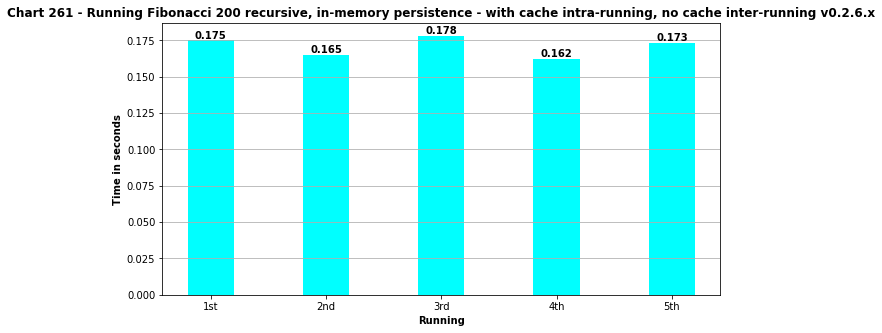

In [61]:
import matplotlib.pyplot as plt

f261 = open("output261.dat", "r")
data261 = []
dataf261 = []
for x in f261.readlines()[1::2]:
  data261.append(float(x))
f261.close()
print(data261)
for datas261 in data261:
  dataf261.append(round(datas261, 3))

running261 = ['1st', '2nd', '3rd', '4th', '5th']

plt.figure(figsize = (10, 5))
plt.bar(running261, dataf261, color ='cyan', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf261):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 261 - Running Fibonacci 200 recursive, in-memory persistence - with cache intra-running, no cache inter-running v0.2.6.x", fontweight='bold')
plt.savefig('chart261_v0.2.6.x.png')
plt.show()

##### **2.6.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.6.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [62]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output262.dat
print("First running in sec (infra and cache construction, slow execution)")
!python test_fib_rec_v02xx.py 200 | tee -a output262.dat
print("---------------------------------")
print("Second running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output262.dat
print("---------------------------------")
print("Third running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output262.dat
print("--------------------------------")
print("Fourth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output262.dat
print("---------------------------------")
print("Fifth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output262.dat
print("---------------------------------")
print("Sixth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output262.dat

print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf fib_200_w_cache_profile_262.dat
print("Running with cache and profiling")
!python -m cProfile -s time test_fib_rec_v02xx.py 200 > fib_200_w_cache_profile_262.dat && head -n 17 fib_200_w_cache_profile_262.dat

---------------------------------
Cleaning up cache
First running in sec (infra and cache construction, slow execution)
2.8057117299251016e+41
0.17140735699999254
---------------------------------
Second running in sec
2.8057117299251016e+41
0.005359879000010892
---------------------------------
Third running in sec
2.8057117299251016e+41
0.005465767999993432
--------------------------------
Fourth running in sec
2.8057117299251016e+41
0.0106851509999899
---------------------------------
Fifth running in sec
2.8057117299251016e+41
0.005459623000007241
---------------------------------
Sixth running in sec
2.8057117299251016e+41
0.005483342000005109
---------------------------------
Cleaning up cache
Running with cache and profiling
2.8057117299251016e+41
0.2927483080000002
         371109 function calls (369044 primitive calls) in 0.323 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25200    0.065    0.000    0.184    

[0.17140735699999254, 0.005359879000010892, 0.005465767999993432, 0.0106851509999899, 0.005459623000007241, 0.005483342000005109]


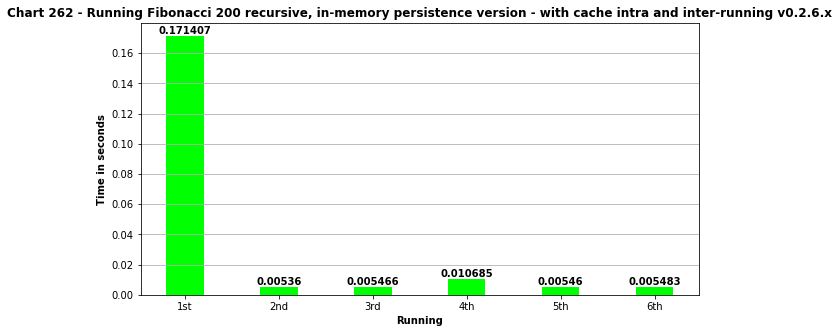

In [63]:
f262 = open("output262.dat", "r")
data262 = []
dataf262 = []
for x in f262.readlines()[1::2]:
  data262.append(float(x))
f262.close()
print(data262)
for datas262 in data262:
  dataf262.append(round(datas262, 6))

running262 = ['1st', '2nd', '3rd', '4th', '5th', '6th']

plt.figure(figsize = (10, 5))
plt.bar(running262, dataf262, color ='lime', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf262):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 262 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running v0.2.6.x", fontweight='bold')
plt.savefig('chart262_v0.2.6.x.png')
plt.show()

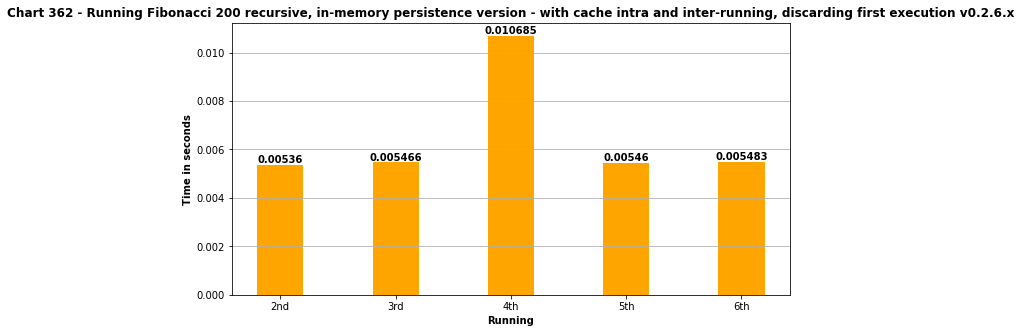

---------------------------------
---------------------------------
Statistics evaluation:
Execution time of each trial, in seconds
[0.005359879000010892, 0.005465767999993432, 0.0106851509999899, 0.005459623000007241, 0.005483342000005109]
Max: 0.0106851509999899
Min: 0.005359879000010892
Mean: 0.006490752600001315
Median: 0.005465767999993432
Standard deviation: 0.0023452372393962663
Variance: 5.5001377090510206e-06


In [64]:
data362 = data262[1::]
dataf362 = dataf262[1::]
running362 = running262[1::]

plt.figure(figsize = (10, 5))
plt.bar(running362, dataf362, color ='orange', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf362):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 362 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running, discarding first execution v0.2.6.x", fontweight='bold')
plt.savefig('chart362_v0.2.6.x.png')
plt.show()

print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
f362 = open("output362.dat", "w")
f362.write("\n")
#print(data)

for y in data362:
  f362.write(str(y)+"\n\n")

f362.close()
print("Execution time of each trial, in seconds")
!python stats_colab.py output362.dat

#### **2.7 Fifth implementation of in-memory persistence (v0.2.7.x)**
- New data is added to CACHED_DATA_DICTIONARY when cache hit occurs (LAZY approach) and new data is added to NEW_DATA_DICTIONARY when cache miss occur and the function decorated with @deterministic is executed. (uses 2 dictionaries).

In [65]:
!git checkout v0.2.7.x

Branch 'v0.2.7.x' set up to track remote branch 'v0.2.7.x' from 'origin'.
Switched to a new branch 'v0.2.7.x'


In [66]:
!git branch

  main
  v0.1.x
  v0.2.1.x
  v0.2.2.x
  v0.2.3.x
  v0.2.4.x
  v0.2.5.x
  v0.2.6.x
* v0.2.7.x


##### **2.7.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.7.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [67]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy/
print("First running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output271.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output271.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output271.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fourth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output271.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Fifth running: value and time in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output271.dat
print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
!python stats_colab.py output271.dat

.		       chart3_v0.1.x.png		output231.dat
..		       chart4_v0.1.x.png		output232.dat
chart1_v0.1.x.png      chart5_v0.1.x.png		output241.dat
chart211_v0.2.1.x.png  fib_200_w_cache_profile_212.dat	output242.dat
chart212_v0.2.1.x.png  fib_200_w_cache_profile_222.dat	output251.dat
chart221_v0.2.2.x.png  fib_200_w_cache_profile_232.dat	output252.dat
chart222_v0.2.2.x.png  fib_200_w_cache_profile_242.dat	output261.dat
chart231_v0.2.3.x.png  fib_200_w_cache_profile_252.dat	output262.dat
chart232_v0.2.3.x.png  fib_200_w_cache_profile_262.dat	output2.dat
chart241_v0.2.4.x.png  fib_200_w_cache_profile_2.dat	output312.dat
chart242_v0.2.4.x.png  fib_200_w_cache_profile.dat	output322.dat
chart251_v0.2.5.x.png  .git				output332.dat
chart252_v0.2.5.x.png  .gitignore			output342.dat
chart261_v0.2.6.x.png  intpy				output352.dat
chart262_v0.2.6.x.png  .intpy				output362.dat
chart2_v0.1.x.png      LICENSE				output3.dat
chart312_v0.2.1.x.png  obs.md				output4.dat
chart322_v0.2.2.x.png  output1.dat

[0.17667830600001366, 0.17984749900000452, 0.1858933219999983, 0.17865634600002522, 0.17636170800000173]


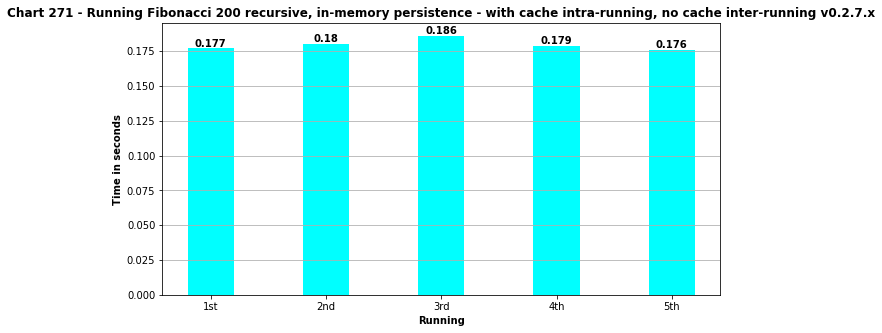

In [68]:
import matplotlib.pyplot as plt

f271 = open("output271.dat", "r")
data271 = []
dataf271 = []
for x in f271.readlines()[1::2]:
  data271.append(float(x))
f271.close()
print(data271)
for datas271 in data271:
  dataf271.append(round(datas271, 3))

running271 = ['1st', '2nd', '3rd', '4th', '5th']

plt.figure(figsize = (10, 5))
plt.bar(running271, dataf271, color ='cyan', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf271):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 271 - Running Fibonacci 200 recursive, in-memory persistence - with cache intra-running, no cache inter-running v0.2.7.x", fontweight='bold')
plt.savefig('chart271_v0.2.7.x.png')
plt.show()

##### **2.7.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.7.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [69]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output272.dat
print("First running in sec (infra and cache construction, slow execution)")
!python test_fib_rec_v02xx.py 200 | tee -a output272.dat
print("---------------------------------")
print("Second running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output272.dat
print("---------------------------------")
print("Third running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output272.dat
print("--------------------------------")
print("Fourth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output272.dat
print("---------------------------------")
print("Fifth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output272.dat
print("---------------------------------")
print("Sixth running in sec")
!python test_fib_rec_v02xx.py 200 | tee -a output272.dat

print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf fib_200_w_cache_profile_272.dat
print("Running with cache and profiling")
!python -m cProfile -s time test_fib_rec_v02xx.py 200 > fib_200_w_cache_profile_272.dat && head -n 17 fib_200_w_cache_profile_272.dat

---------------------------------
Cleaning up cache
First running in sec (infra and cache construction, slow execution)
2.8057117299251016e+41
0.19050805300000206
---------------------------------
Second running in sec
2.8057117299251016e+41
0.005312486000008221
---------------------------------
Third running in sec
2.8057117299251016e+41
0.005781288000008544
--------------------------------
Fourth running in sec
2.8057117299251016e+41
0.006556931000005761
---------------------------------
Fifth running in sec
2.8057117299251016e+41
0.008401579000008041
---------------------------------
Sixth running in sec
2.8057117299251016e+41
0.00522356600001217
---------------------------------
Cleaning up cache
Running with cache and profiling
2.8057117299251016e+41
0.2784287059999997
         372117 function calls (370064 primitive calls) in 0.313 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    25200    0.060    0.000    0.167   

[0.19050805300000206, 0.005312486000008221, 0.005781288000008544, 0.006556931000005761, 0.008401579000008041, 0.00522356600001217]


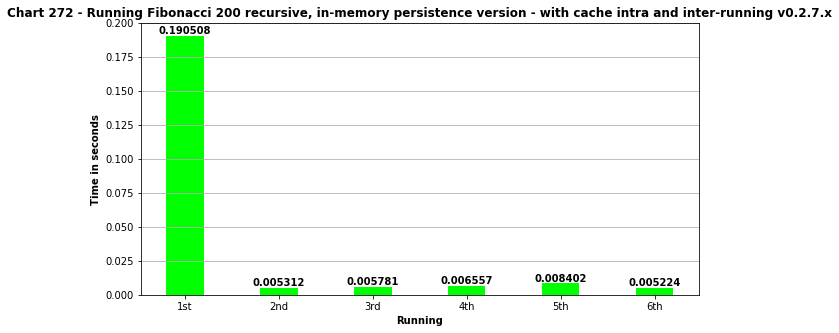

In [70]:
f272 = open("output272.dat", "r")
data272 = []
dataf272 = []
for x in f272.readlines()[1::2]:
  data272.append(float(x))
f272.close()
print(data272)
for datas272 in data272:
  dataf272.append(round(datas272, 6))

running272 = ['1st', '2nd', '3rd', '4th', '5th', '6th']

plt.figure(figsize = (10, 5))
plt.bar(running272, dataf272, color ='lime', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf272):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 272 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running v0.2.7.x", fontweight='bold')
plt.savefig('chart272_v0.2.7.x.png')
plt.show()

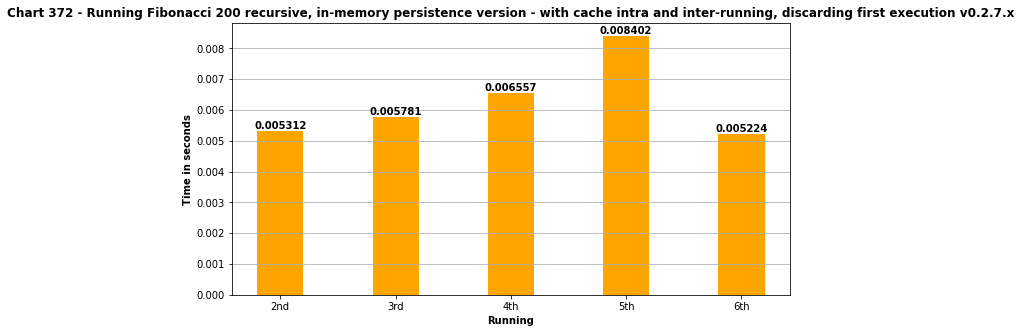

---------------------------------
---------------------------------
Statistics evaluation:
Execution time of each trial, in seconds
[0.005312486000008221, 0.005781288000008544, 0.006556931000005761, 0.008401579000008041, 0.00522356600001217]
Max: 0.008401579000008041
Min: 0.00522356600001217
Mean: 0.006255170000008548
Median: 0.005781288000008544
Standard deviation: 0.001311064012833402
Variance: 1.7188888457468229e-06


In [71]:
data372 = data272[1::]
dataf372 = dataf272[1::]
running372 = running272[1::]

plt.figure(figsize = (10, 5))
plt.bar(running372, dataf372, color ='orange', width = 0.4)
plt.grid(axis='y')

for index, datas in enumerate(dataf372):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

plt.xlabel("Running", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Chart 372 - Running Fibonacci 200 recursive, in-memory persistence version - with cache intra and inter-running, discarding first execution v0.2.7.x", fontweight='bold')
plt.savefig('chart372_v0.2.7.x.png')
plt.show()

print("---------------------------------")
print("---------------------------------")
print("Statistics evaluation:")
f372 = open("output372.dat", "w")
f372.write("\n")
#print(data)

for y in data372:
  f372.write(str(y)+"\n\n")

f372.close()
print("Execution time of each trial, in seconds")
!python stats_colab.py output372.dat

### **C. Analysis and conclusions of the evaluation**

#### **C.0 Baseline**

- **<i>IntPy</i>** is a software written in Python whose goal is to speed up Python programs, scientific experiments and data science experiments using memoization as cache support (intra and inter-executions) and other computing techniques to reduce the execution time of the experiments.
- To guarantee the reproducibility of the evaluations concerning the different versions, we will use Python notebooks through Google Colab, with the hardware and software environment of each notebook presented in the first cells.
- After cloning the repository, the execution environment will point to an evaluation version.
- **In this experiment, we evaluated a recursive algorithm that implements the Fibonacci series calculation up to 200 in all versions available of the IntPy**, from v0.1.x version to other versions. Version v0.1.x is the original version of the software (https://github.com/MFrat/Intpy and https://github.com/dew-uff/intPy-eScience) with some bug fixes, instrumentation, and improvements but without changing the architectural design of the original software.
- As a reference for the evaluation of the experiment with IntPy, see below the figure of the execution of the algorithm in question in its version without acceleration (without cache, without IntPy). The recursive algorithm for calculating the Fibonacci series has exponential complexity, so it consumes a lot of processing and has a very long duration for values considered high in this series. The attempt was made for Fibonacci 200 and Fibonacci 100, but the platform was disconnected without returning the result, given the huge demand for processing. The Fibonacci calculation of 50 running successfully, but the processing took 4970.35 seconds, which is equivalent to 1h22m50s. This value will be the reference for the following experiments with the IntPy cache scheme.
- Reference of the Fibonacci series values calculated up to the number 300: http://www.maths.surrey.ac.uk/hosted-sites/R.Knott/Fibonacci/fibtable.html 

![**Figura fib 50 raw**](https://raw.githubusercontent.com/claytonchagas/intpy/main/pics/fib_rec_50_raw_colab_1h22m50s_08_09_mai_2021_crop.jpg)

#### **C.1 IntPy v0.1.x**
- Version v0.1.x is the original version of the software (https://github.com/MFrat/Intpy and https://github.com/dew-uff/intPy-eScience) with some bug fixes, instrumentation, and improvements but without changing the architectural design of the original software.

##### **C.1.1 First trial: Fibonacci 200 recursive with IntPy (cache only intra-execution):**

- The **first trial of recursive Fibonacci 200 with IntPy** was designed to perform 5 executions with the same entry and the same setup, with the cache enabled within the same execution (with intra-execution cache) but being deleted between executions (without inter-cache). With this, we evaluate the acceleration of the algorithm with the intra-execution cache, but not the acceleration between executions.
- The result of the 5 executions in seconds, the calculation of the statistics, and the representative graph is shown below:


In [72]:
!python stats_colab.py output1.dat

[1.8679145209999959, 1.7595585979999981, 1.8584046339999958, 1.8238221640000063, 1.7411432999999903]
Max: 1.8679145209999959
Min: 1.7411432999999903
Mean: 1.8101686433999973
Median: 1.8238221640000063
Standard deviation: 0.05738813143980839
Variance: 0.0032933976301527243


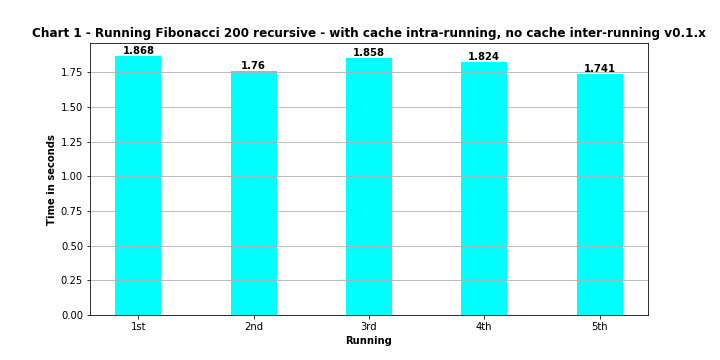

In [73]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart1_v0.1.x.png")

##### **C.1.2 Second trial: Fibonacci 200 recursive with IntPy (cache inter and intra-execution):**

- The **second trial of recursive Fibonacci 200 with IntPy** was designed to perform 6 executions with the same entry and the same setup, with the cache enabled within the same execution and between executions (with intra and inter-execution cache). With this, we evaluate the acceleration of the algorithm with inter and intra-execution cache.
- The result of the 6 executions in seconds and the representative graph is shown below:

In [74]:
print(data2)

[1.8738589820000016, 0.00524300300000391, 0.005554966000005379, 0.006906153000002746, 0.008605795999997667, 0.00543168600000854]


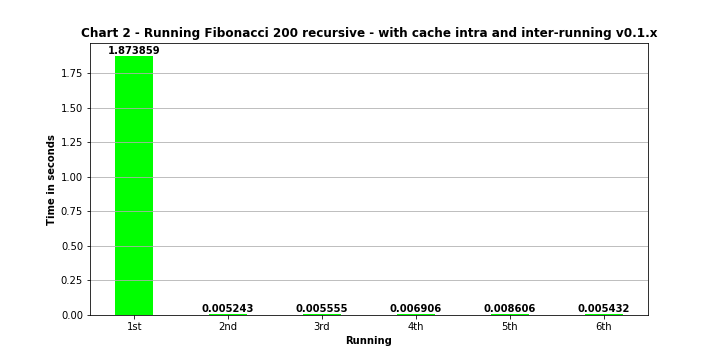

In [75]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart2_v0.1.x.png")

- As can be seen by analyzing the graph and the results, the first running continued to make good use of the intra-execution cache, with the time spent in the same order of magnitude as the executions of the first trial. From the second execution, with the inter-execution cache, as the result of the input is already in the experiment database, the execution is much faster compared to the first execution, since only one query is made to the database. We exclude the first running (slow execution: building the cache infrastructure and inserting values into the database) and then statistically compare the values of the fast runings.

- After discarding the first slow execution, the result of the 5 remaining executions (fast executions) in seconds, the calculation of the statistics, and the representative graph is shown below:

In [76]:
!python stats_colab.py output3.dat

[0.00524300300000391, 0.005554966000005379, 0.006906153000002746, 0.008605795999997667, 0.00543168600000854]
Max: 0.008605795999997667
Min: 0.00524300300000391
Mean: 0.006348320800003649
Median: 0.005554966000005379
Standard deviation: 0.0014229133561273592
Variance: 2.0246824190456247e-06


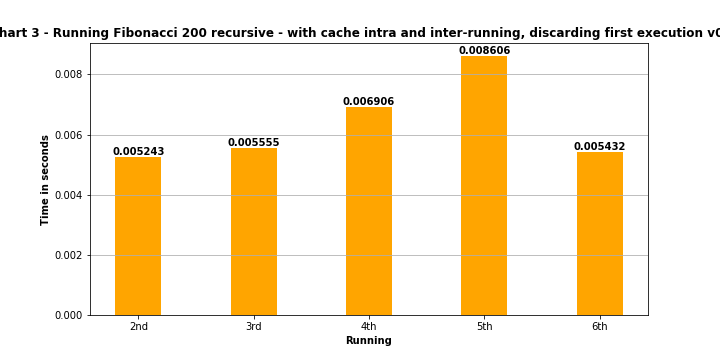

In [77]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart3_v0.1.x.png")

- To investigate the reason for this difference between the first and the other iterations in the second trial, even though we know that in the first run we have the cache construction and the insertion of the calculation of each Fibonacci number up to 200 in the database (which can give a hint as to why this difference), we run the algorithm again but with Python profiling enabled (passing the parameter "-m cProfile -s time" in the call). As the cache has been cleared and the algorithm has been executed again, the output number in relation to the execution time will not be exactly the same, but it is expected to be of the same order of magnitude as the first execution of the second test (only the ten slower calls will be presented):

In [78]:
!head -n 17 fib_200_w_cache_profile.dat

2.8057117299251016e+41
1.9784082580000018
         348295 function calls (346249 primitive calls) in 1.999 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      201    1.500    0.007    1.500    0.007 {method 'commit' of 'sqlite3.Connection' objects}
      601    0.086    0.000    0.086    0.000 {method 'execute' of 'sqlite3.Connection' objects}
    24600    0.068    0.000    0.187    0.000 tokenize.py:487(_tokenize)
    21105    0.039    0.000    0.039    0.000 {method 'match' of 're.Pattern' objects}
      601    0.036    0.000    0.036    0.000 {built-in method _sqlite3.connect}
    21104    0.023    0.000    0.050    0.000 re.py:273(_compile)
      600    0.023    0.000    0.227    0.000 inspect.py:935(getblock)
      400    0.016    0.000    0.016    0.000 {built-in method io.open}
    24000    0.016    0.000    0.016    0.000 inspect.py:891(tokeneater)
    20400    0.010    0.000    0.062    0.000 tokenize.py:147(_com

- As we suspected, of the five slowest calls, three are associated with operations in the database, the first being very different from the others. Another observation is that the number of calls is very large, one for each atomic operation, which certainly influences this slower behavior, since they are I/O operations.

- In view of this scenario, the target of the next version of IntPy (v0.2.x) and consequently of the next evaluation, should be the architectural redesign in relation to the persistence mechanisms to try to solve this delay of the first execution in relation to the others. Can we make the first execution as fast as the others, or at least, faster than in this current architecture?

##### **C.1.3 Third trial: changing the inputs, Fibonacci 200, 100, and 50 with IntPy**

- Finally, we did the last three tests, all to calculate Fibonacci of 50, 100 and 200, to check if the cache has any effectiveness for different entries.

- In the first test, we calculated Fibonacci for 200, 100 and 50 only with the intra-execution cache. This will be our baseline to analyze later if the inter-execution cache works with different inputs.

- In the second test we calculated Fibonacci for 200, 100 and 50 with the inter and intra-executions cache.

- In the third test we inverted the order of the inputs and calculated Fibonacci for 50, 100 and 200 with the inter and intra-executions cache to see if we have a different behavior.

------------------------------------
- First test's output, for Fibonacci 200, 100 and 50 **only with the intra-execution cache** (number and time spent in seconds):

In [79]:
print("---------------------------------")
print("Fibonacci 200:")
!head -n 2 output4.dat
print("---------------------------------")
print("Fibonacci 100:")
!head -n 4 output4.dat | tail +3
print("---------------------------------")
print("Fibonacci 50:")
!head -n 6 output4.dat | tail +5

---------------------------------
Fibonacci 200:
2.8057117299251016e+41
1.7931664729999994
---------------------------------
Fibonacci 100:
3.54224848179262e+20
0.8650127579999918
---------------------------------
Fibonacci 50:
12586269025.0
0.4610688700000054


------------------------------------
- Second test's output, for Fibonacci 200, 100 and 50 **with the inter and intra-execution cache** (number and time spent in seconds):

In [80]:
print("---------------------------------")
print("Fibonacci 200:")
!head -n 8 output4.dat | tail +7
print("---------------------------------")
print("Fibonacci 100:")
!head -n 10 output4.dat | tail +9
print("---------------------------------")
print("Fibonacci 50:")
!head -n 12 output4.dat | tail +11

---------------------------------
Fibonacci 200:
2.8057117299251016e+41
1.8101112880000017
---------------------------------
Fibonacci 100:
3.54224848179262e+20
0.005412436999989723
---------------------------------
Fibonacci 50:
12586269025.0
0.005376490000003287


------------------------------------
- Third test's output, for Fibonacci 50, 100 and 200 **with the inter and intra-execution cache** (number and time spent in seconds):

In [81]:
print("---------------------------------")
print("Fibonacci 50:")
!head -n 14 output4.dat | tail +13
print("---------------------------------")
print("Fibonacci 100:")
!head -n 16 output4.dat | tail +15
print("---------------------------------")
print("Fibonacci 200:")
!head -n 18 output4.dat | tail +17

---------------------------------
Fibonacci 50:
12586269025.0
0.4751674989999941
---------------------------------
Fibonacci 100:
3.54224848179262e+20
0.4769744609999975
---------------------------------
Fibonacci 200:
2.8057117299251016e+41
0.9217639829999911


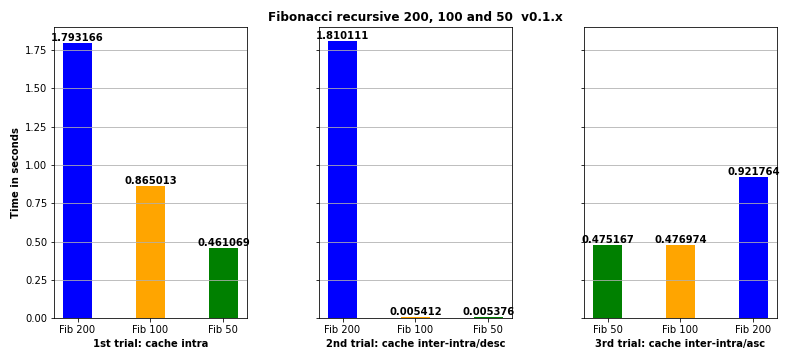

In [82]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart5_v0.1.x.png")

- As shown in the graph, even with different inputs, there is an efficient use of the cache.
- In the first test, we calculate the base times only with the intra-execution cache, and, as expected, we have a downward step with the Fibonacci of 200 at a certain level, Fibonacci of 100 with a proportionately shorter time, and the same happening with the Fibonacci of 50.
- For the second test, we cleared the cache, so in the Fibonacci execution of 200, the time spent is the same magnitude as the previous test for the same input. However, as the inter-execution cache is enabled, the Fibonacci of all numbers below 200 are also in the database. So, even with different entries, in the case of Fibonacci of 100 and 50, as these numbers have already been calculated, when requested, only one query is made to the database and the time is shorter than the original, only with intra-cache.
- In the third test, we have an interesting behavior, where the Fibonacci of 50 is calculated in the same magnitude as the first test, but when the Fibonacci of 100 is called, it takes advantage of all the results calculated from 50 downwards, making the magnitude of the time spent be lesser than the time of the first test. The same occurs with the Fibonacci 200, which takes advantage of all the results previously stored in the database, being computed in approximately half the time of the first test.

#### **C.2 IntPy v0.2.x**
- IntPy's improvements on the persistence architecture

##### **C.2.1 First implementation of in-memory persistence (v0.2.1.x)** 
- New data is added to the dictionary only when cache miss occur and the function decorated with @deterministic is executed.

###### **C.2.1.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.1.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot.

In [83]:
!python stats_colab.py output211.dat

[0.17667086299999823, 0.1989224420000113, 0.16888601300000516, 0.17386153200000365, 0.1857164279999921]
Max: 0.1989224420000113
Min: 0.16888601300000516
Mean: 0.18081145560000209
Median: 0.17667086299999823
Standard deviation: 0.011829293184261114
Variance: 0.00013993217723920647


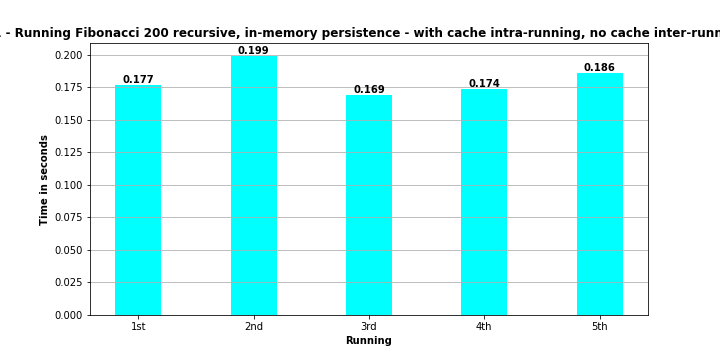

In [84]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart211_v0.2.1.x.png")

###### **C.2.1.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.1.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [85]:
print(data212)

[0.1952321109999957, 0.005051803999990057, 0.005199114000006944, 0.005507000999998013, 0.005416468999996482, 0.005205349000007686]


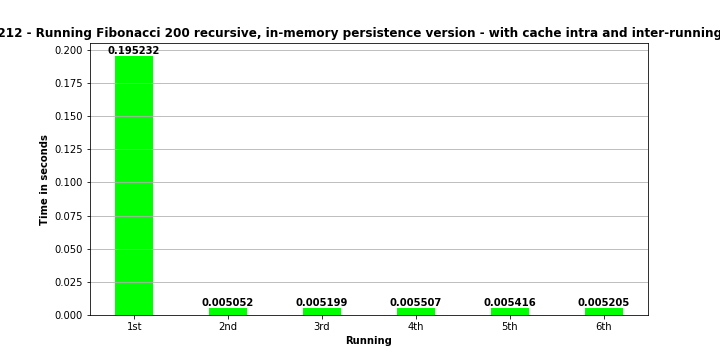

In [86]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart212_v0.2.1.x.png")

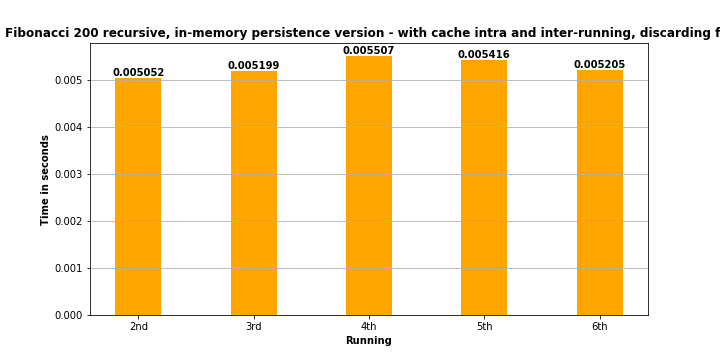

In [87]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart312_v0.2.1.x.png")

In [88]:
!python stats_colab.py output312.dat

[0.005051803999990057, 0.005199114000006944, 0.005507000999998013, 0.005416468999996482, 0.005205349000007686]
Max: 0.005507000999998013
Min: 0.005051803999990057
Mean: 0.005275947399999837
Median: 0.005205349000007686
Standard deviation: 0.00018320743389775313
Variance: 3.356496383539958e-08


##### **C.2.2 Second implementation of in-memory persistence (v0.2.2.x)** 
- At the begining of the execution all the data cached is loaded to the dictonary before the user script starts to run (uses 1 dictionary).

###### **C.2.2.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.2.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot.

In [89]:
!python stats_colab.py output221.dat

[0.18021064000001275, 0.17013602500000502, 0.17284301899999832, 0.1722170580000011, 0.16147513800000013]
Max: 0.18021064000001275
Min: 0.16147513800000013
Mean: 0.17137637600000347
Median: 0.1722170580000011
Standard deviation: 0.006717049070691703
Variance: 4.511874821808027e-05


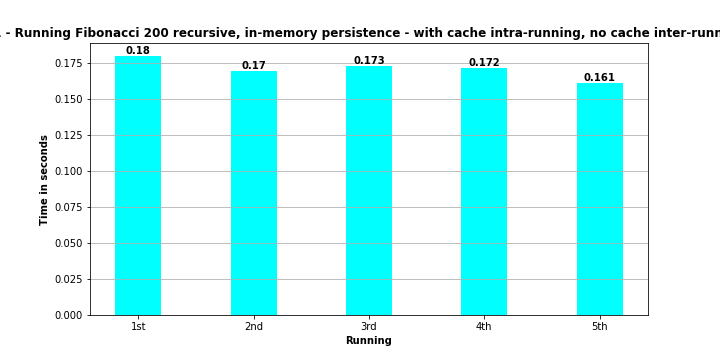

In [90]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart221_v0.2.2.x.png")

###### **C.2.2.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.2.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [91]:
print(data222)

[0.16767364599999723, 0.03900844899999356, 0.041470856000003664, 0.0411053910000021, 0.0342569860000026, 0.03653246300000035]


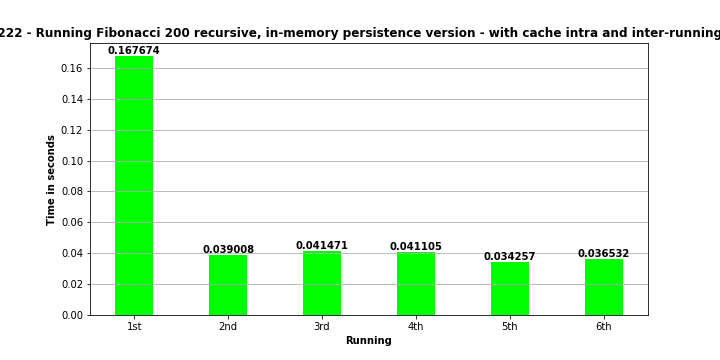

In [92]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart222_v0.2.2.x.png")

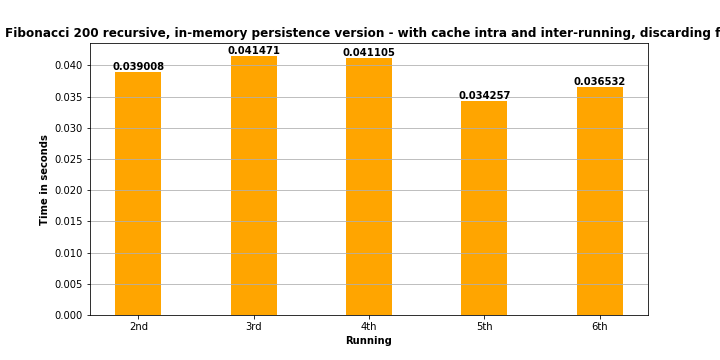

In [93]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart322_v0.2.2.x.png")

In [94]:
!python stats_colab.py output322.dat

[0.03900844899999356, 0.041470856000003664, 0.0411053910000021, 0.0342569860000026, 0.03653246300000035]
Max: 0.041470856000003664
Min: 0.0342569860000026
Mean: 0.03847482900000045
Median: 0.03900844899999356
Standard deviation: 0.0030717979171643464
Variance: 9.435942443895216e-06


##### **C.2.3 Third implementation of in-memory persistence (v0.2.3.x)** 
- At the begining of the execution all the data cached is loaded to the dictionary CACHED_DATA_DICTIONARY before the user script starts to run. When cache miss occurs and a function decorated with @deterministic is processed, its result is stored in NEW_DATA_DICTIONARY. This way, only the elements of NEW_DATA_DICTIONARY are added to the database at the end of the execution (uses 2 dictionaries).

###### **C.2.3.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.3.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [95]:
!python stats_colab.py output231.dat

[0.18226016100000209, 0.1682589650000068, 0.18414653100001033, 0.17676681399998984, 0.16850252700000112]
Max: 0.18414653100001033
Min: 0.1682589650000068
Mean: 0.17598699960000203
Median: 0.17676681399998984
Standard deviation: 0.007454503102076757
Variance: 5.556961649887199e-05


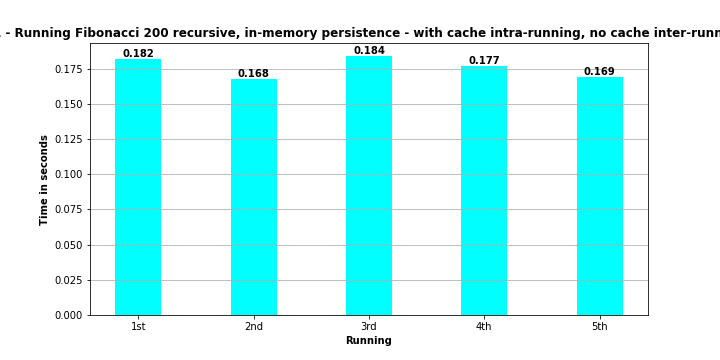

In [96]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart231_v0.2.3.x.png")

###### **C.2.3.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.3.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [97]:
print(data232)

[0.18253424699999243, 0.004991317000005324, 0.0057109669999988455, 0.004794715000002725, 0.004871731999998019, 0.00477412900001184]


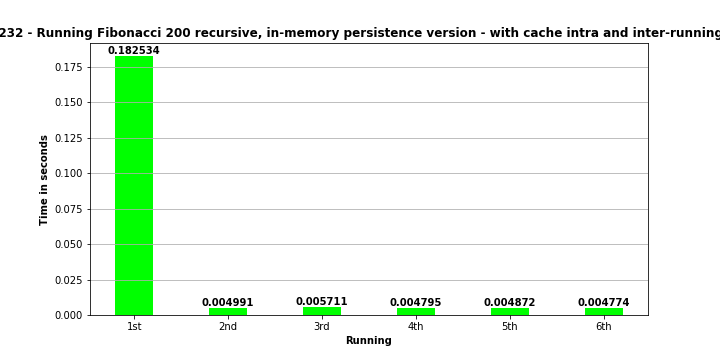

In [98]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart232_v0.2.3.x.png")

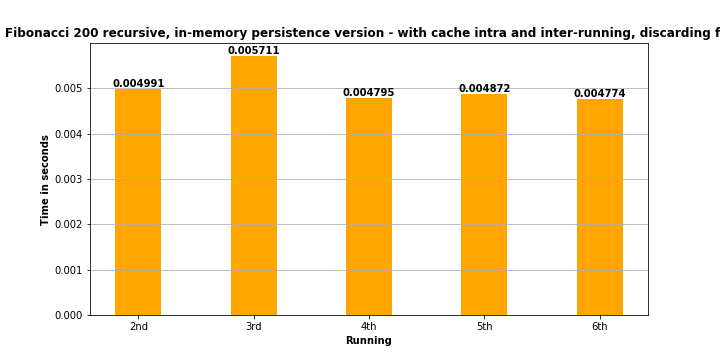

In [99]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart332_v0.2.3.x.png")

In [100]:
!python stats_colab.py output332.dat

[0.004991317000005324, 0.0057109669999988455, 0.004794715000002725, 0.004871731999998019, 0.00477412900001184]
Max: 0.0057109669999988455
Min: 0.00477412900001184
Mean: 0.005028572000003351
Median: 0.004871731999998019
Standard deviation: 0.0003908580283617536
Variance: 1.5276999833483737e-07


##### **C.2.4 Fourth implementation of in-memory persistence (v0.2.4.x)**
- At the begining of the execution a thread is started to load all the data cached in the database to the dictionary CACHED_DATA_DICTIONARY. When cache miss occurs and a function decorated with @deterministic is processed, its result is stored in NEW_DATA_DICTIONARY. Only the elements of NEW_DATA_DICTIONARY are added to the database at the end of the execution but it is possible that some elements in NEW_DATA_DICTIONARY are already in the database due to the concurrent execution of the experiment and the thread that populates CACHED_DATA_DICTIONARY. (uses 2 dictionaries).

###### **C.2.4.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.4.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [101]:
!python stats_colab.py output241.dat

[0.17109244600000295, 0.1891049950000081, 0.1824487850000054, 0.17023392099999057, 0.16326772400000777]
Max: 0.1891049950000081
Min: 0.16326772400000777
Mean: 0.17522957420000296
Median: 0.17109244600000295
Standard deviation: 0.010365839905637667
Variance: 0.00010745063694931031


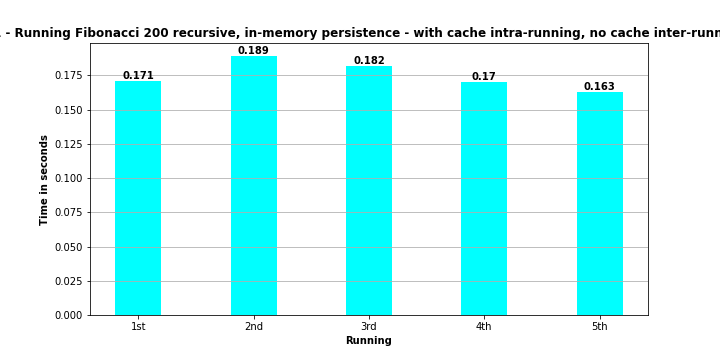

In [102]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart241_v0.2.4.x.png")

###### **C.2.4.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.4.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [103]:
print(data242)

[0.17775569500000188, 0.20640724000000432, 0.210247336000009, 0.10920371999999645, 0.21142000099999336, 0.20053627000000063]


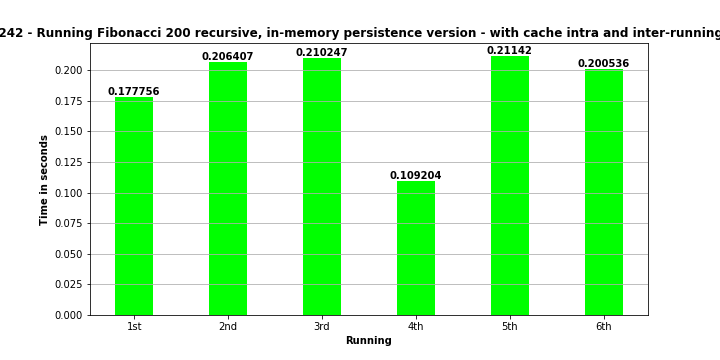

In [104]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart242_v0.2.4.x.png")

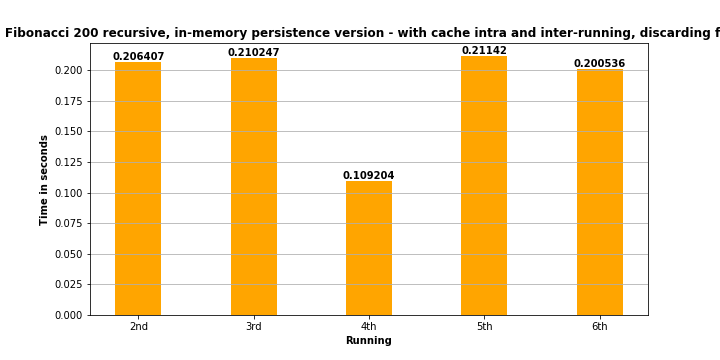

In [105]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart342_v0.2.4.x.png")

In [106]:
!python stats_colab.py output342.dat

[0.20640724000000432, 0.210247336000009, 0.10920371999999645, 0.21142000099999336, 0.20053627000000063]
Max: 0.21142000099999336
Min: 0.10920371999999645
Mean: 0.18756291340000075
Median: 0.20640724000000432
Standard deviation: 0.044009440675345804
Variance: 0.0019368308685567815


##### **C.2.5 Fifth implementation of in-memory persistence (v0.2.5.x)**
- When @deterministic is executed a select query is created to the database to bring all results of the function decorated with @deterministic stored in the cache. A list of functions already inserted to the dictionary is maintained to avoid unecessary querys to the database. The results are then stored in the dictionary CACHED_DATA_DICTIONARY. When cache miss occurs and a function decorated with @deterministic is processed, its result is stored in NEW_DATA_DICTIONARY. This way, only the elements of NEW_DATA_DICTIONARY are added to the database at the end of the execution. (uses 2 dictionaries).

###### **C.2.5.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.5.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [107]:
!python stats_colab.py output251.dat

[0.1733863270000029, 0.17521449599999528, 0.1659345319999943, 0.17260191800001223, 0.16448025700000812]
Max: 0.17521449599999528
Min: 0.16448025700000812
Mean: 0.17032350600000257
Median: 0.17260191800001223
Standard deviation: 0.0047932366035004035
Variance: 2.2975117137136084e-05


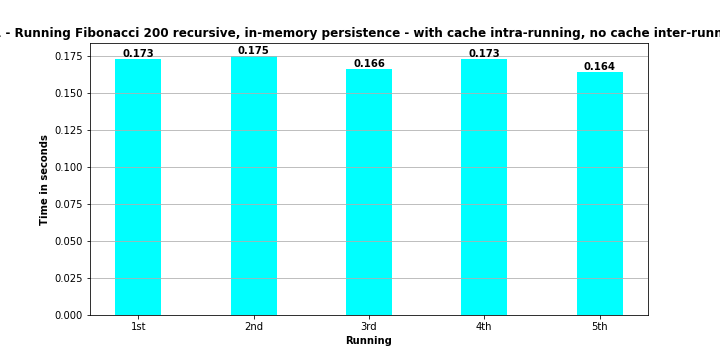

In [108]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart251_v0.2.5.x.png")

###### **C.2.5.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.5.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [109]:
print(data252)

[0.1860985229999983, 0.008184726999999725, 0.008121994999996218, 0.007723304000009534, 0.008126140999991094, 0.00793325300000447]


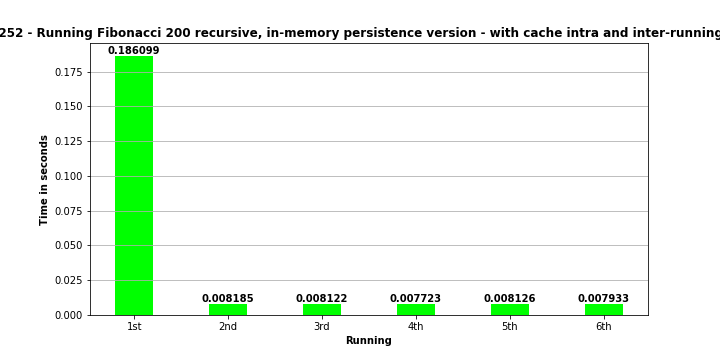

In [110]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart252_v0.2.5.x.png")

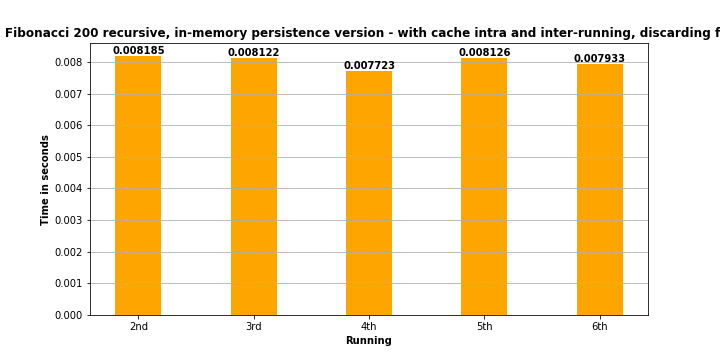

In [111]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart352_v0.2.5.x.png")

In [112]:
!python stats_colab.py output352.dat

[0.008184726999999725, 0.008121994999996218, 0.007723304000009534, 0.008126140999991094, 0.00793325300000447]
Max: 0.008184726999999725
Min: 0.007723304000009534
Mean: 0.008017884000000208
Median: 0.008121994999996218
Standard deviation: 0.00018995726333232083
Variance: 3.608376189270468e-08


##### **C.2.6 Fifth implementation of in-memory persistence (v0.2.6.x)**
- When @deterministic is executed a select query is created to the database to bring all results of the function decorated with @deterministic stored in the cache. A list of functions already inserted to the dictionary is maintained to avoid unecessary querys to the database. The results of the query are stored in the dictionary CACHED_DATA_DICTIONARY by a thread. When cache miss occurs and a function decorated with @deterministic is processed, its result is stored in NEW_DATA_DICTIONARY. This way, only the elements of NEW_DATA_DICTIONARY are added to the database at the end of the execution (uses 2 dictionaries).

###### **C.2.6.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.6.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [113]:
!python stats_colab.py output261.dat

[0.17497233499999254, 0.1653244970000003, 0.17758298000001105, 0.16245985000000474, 0.17310104300000262]
Max: 0.17758298000001105
Min: 0.16245985000000474
Mean: 0.17068814100000224
Median: 0.17310104300000262
Standard deviation: 0.00648437870706589
Variance: 4.20471672166495e-05


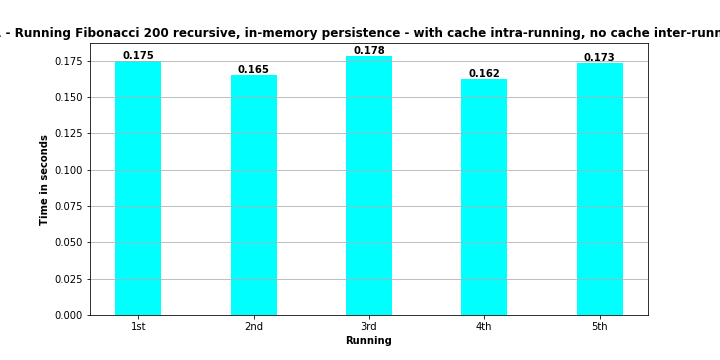

In [114]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart261_v0.2.6.x.png")

###### **C.2.6.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.6.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [115]:
print(data262)

[0.17140735699999254, 0.005359879000010892, 0.005465767999993432, 0.0106851509999899, 0.005459623000007241, 0.005483342000005109]


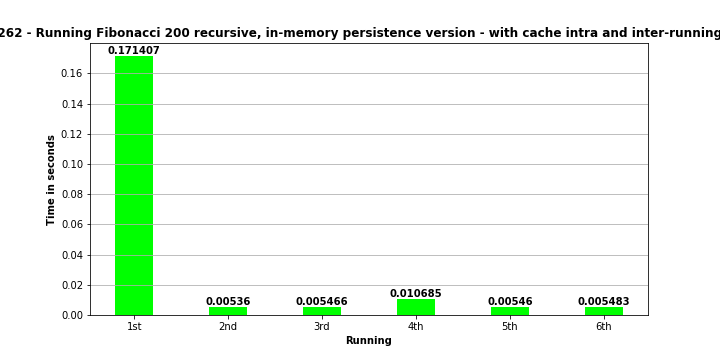

In [116]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart262_v0.2.6.x.png")

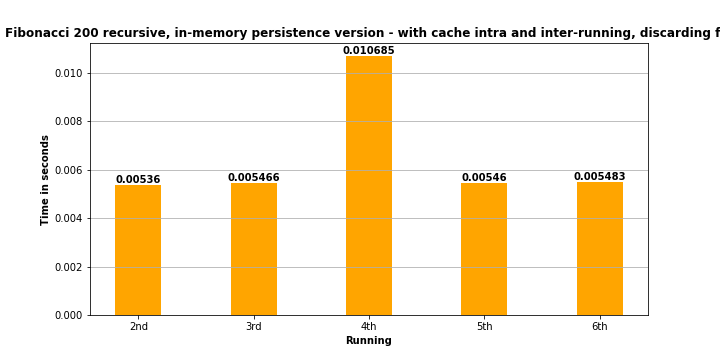

In [117]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart362_v0.2.6.x.png")

In [118]:
!python stats_colab.py output362.dat

[0.005359879000010892, 0.005465767999993432, 0.0106851509999899, 0.005459623000007241, 0.005483342000005109]
Max: 0.0106851509999899
Min: 0.005359879000010892
Mean: 0.006490752600001315
Median: 0.005465767999993432
Standard deviation: 0.0023452372393962663
Variance: 5.5001377090510206e-06


##### **C.2.7 Fifth implementation of in-memory persistence (v0.2.7.x)**
- New data is added to CACHED_DATA_DICTIONARY when cache hit occurs (LAZY approach) and new data is added to NEW_DATA_DICTIONARY when cache miss occur and the function decorated with @deterministic is executed. (uses 2 dictionaries).

###### **C.2.7.1 Fibonacci 200 recursive, no inter-cache, in-memory persistence version (v0.2.7.x)**
- Evaluating recursive fibonacci code, input 200, no inter-cache, in-memory persistence version, running 5x, calculates statistics and graphic plot

In [119]:
!python stats_colab.py output271.dat

[0.17667830600001366, 0.17984749900000452, 0.1858933219999983, 0.17865634600002522, 0.17636170800000173]
Max: 0.1858933219999983
Min: 0.17636170800000173
Mean: 0.17948743620000868
Median: 0.17865634600002522
Standard deviation: 0.0038573669220013564
Variance: 1.4879279570950218e-05


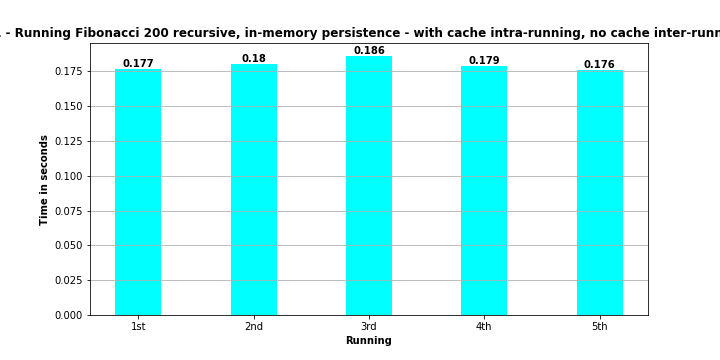

In [120]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart271_v0.2.7.x.png")

###### **C.2.7.2 Fibonacci 200 recursive, with inter and intra-cache, in-memory persistence version (v0.2.7.x)**
- Evaluating recursive fibonacci code, input 200, <u>with inter and intra- cache, in-memory persistence version</u>, running 6x, graphic plot, then discards first execution (infra and cache construction, slow execution), calculates statistics and graphic plot.
- Profiling the first execution to investigate the delay through running.

In [121]:
print(data272)

[0.19050805300000206, 0.005312486000008221, 0.005781288000008544, 0.006556931000005761, 0.008401579000008041, 0.00522356600001217]


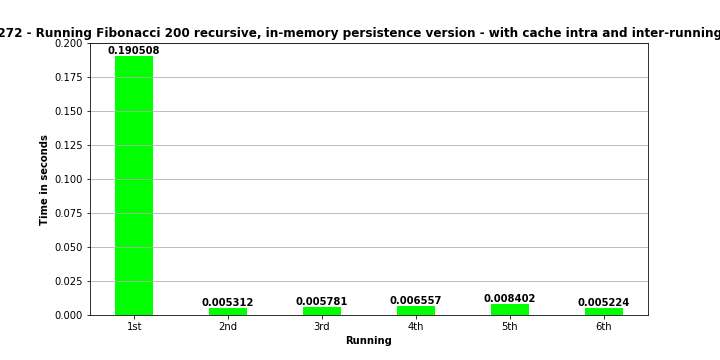

In [122]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart272_v0.2.7.x.png")

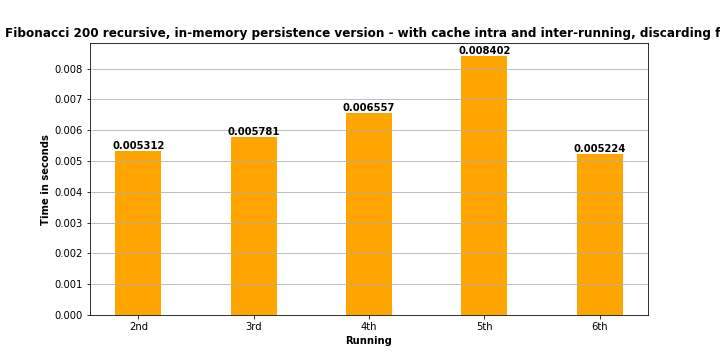

In [123]:
from IPython.display import Image
Image(filename="/content/intpy_dev/chart372_v0.2.7.x.png")

In [124]:
!python stats_colab.py output372.dat

[0.005312486000008221, 0.005781288000008544, 0.006556931000005761, 0.008401579000008041, 0.00522356600001217]
Max: 0.008401579000008041
Min: 0.00522356600001217
Mean: 0.006255170000008548
Median: 0.005781288000008544
Standard deviation: 0.001311064012833402
Variance: 1.7188888457468229e-06


In [125]:
!ls -a

.		       chart3_v0.1.x.png		output241.dat
..		       chart4_v0.1.x.png		output242.dat
chart1_v0.1.x.png      chart5_v0.1.x.png		output251.dat
chart211_v0.2.1.x.png  fib_200_w_cache_profile_212.dat	output252.dat
chart212_v0.2.1.x.png  fib_200_w_cache_profile_222.dat	output261.dat
chart221_v0.2.2.x.png  fib_200_w_cache_profile_232.dat	output262.dat
chart222_v0.2.2.x.png  fib_200_w_cache_profile_242.dat	output271.dat
chart231_v0.2.3.x.png  fib_200_w_cache_profile_252.dat	output272.dat
chart232_v0.2.3.x.png  fib_200_w_cache_profile_262.dat	output2.dat
chart241_v0.2.4.x.png  fib_200_w_cache_profile_272.dat	output312.dat
chart242_v0.2.4.x.png  fib_200_w_cache_profile_2.dat	output322.dat
chart251_v0.2.5.x.png  fib_200_w_cache_profile.dat	output332.dat
chart252_v0.2.5.x.png  .git				output342.dat
chart261_v0.2.6.x.png  .gitignore			output352.dat
chart262_v0.2.6.x.png  intpy				output362.dat
chart271_v0.2.7.x.png  .intpy				output372.dat
chart272_v0.2.7.x.png  LICENSE				output3.dat
chart2_v0.

#### **C. Summary**

In [126]:
import statistics

intra = []
intra_inter = []
intra_inter_less_1st = []

print(data1)
print(data2)
print(data3)
v01x_intra=statistics.median(data1)
v01x_intra_inter=statistics.median(data2)
v01x_intra_inter_less_1st=statistics.median(data3)
print(v01x_intra)
print(v01x_intra_inter)
print(v01x_intra_inter_less_1st)
intra.append(round(v01x_intra, 6))
intra_inter.append(round(v01x_intra_inter, 6))
intra_inter_less_1st.append(round(v01x_intra_inter_less_1st, 6))

print(data211)
print(data212)
print(data312)
v021x_intra=statistics.median(data211)
v021x_intra_inter=statistics.median(data212)
v021x_intra_inter_less_1st=statistics.median(data312)
print(v021x_intra)
print(v021x_intra_inter)
print(v021x_intra_inter_less_1st)
intra.append(round(v021x_intra, 6))
intra_inter.append(round(v021x_intra_inter, 6))
intra_inter_less_1st.append(round(v021x_intra_inter_less_1st, 6))

print(data221)
print(data222)
print(data322)
v022x_intra=statistics.median(data221)
v022x_intra_inter=statistics.median(data222)
v022x_intra_inter_less_1st=statistics.median(data322)
print(v022x_intra)
print(v022x_intra_inter)
print(v022x_intra_inter_less_1st)
intra.append(round(v022x_intra, 6))
intra_inter.append(round(v022x_intra_inter, 6))
intra_inter_less_1st.append(round(v022x_intra_inter_less_1st, 6))

print(data231)
print(data232)
print(data332)
v023x_intra=statistics.median(data231)
v023x_intra_inter=statistics.median(data232)
v023x_intra_inter_less_1st=statistics.median(data332)
print(v023x_intra)
print(v023x_intra_inter)
print(v023x_intra_inter_less_1st)
intra.append(round(v023x_intra, 6))
intra_inter.append(round(v023x_intra_inter, 6))
intra_inter_less_1st.append(round(v023x_intra_inter_less_1st, 6))

print(data241)
print(data242)
print(data342)
v024x_intra=statistics.median(data241)
v024x_intra_inter=statistics.median(data242)
v024x_intra_inter_less_1st=statistics.median(data342)
print(v024x_intra)
print(v024x_intra_inter)
print(v024x_intra_inter_less_1st)
intra.append(round(v024x_intra, 6))
intra_inter.append(round(v024x_intra_inter, 6))
intra_inter_less_1st.append(round(v024x_intra_inter_less_1st, 6))

print(data251)
print(data252)
print(data352)
v025x_intra=statistics.median(data251)
v025x_intra_inter=statistics.median(data252)
v025x_intra_inter_less_1st=statistics.median(data352)
print(v025x_intra)
print(v025x_intra_inter)
print(v025x_intra_inter_less_1st)
intra.append(round(v025x_intra, 6))
intra_inter.append(round(v025x_intra_inter, 6))
intra_inter_less_1st.append(round(v025x_intra_inter_less_1st, 6))

print(data261)
print(data262)
print(data362)
v026x_intra=statistics.median(data261)
v026x_intra_inter=statistics.median(data262)
v026x_intra_inter_less_1st=statistics.median(data362)
print(v026x_intra)
print(v026x_intra_inter)
print(v026x_intra_inter_less_1st)
intra.append(round(v026x_intra, 6))
intra_inter.append(round(v026x_intra_inter, 6))
intra_inter_less_1st.append(round(v026x_intra_inter_less_1st, 6))

print(data271)
print(data272)
print(data372)
v027x_intra=statistics.median(data271)
v027x_intra_inter=statistics.median(data272)
v027x_intra_inter_less_1st=statistics.median(data372)
print(v027x_intra)
print(v027x_intra_inter)
print(v027x_intra_inter_less_1st)
intra.append(round(v027x_intra, 6))
intra_inter.append(round(v027x_intra_inter, 6))
intra_inter_less_1st.append(round(v027x_intra_inter_less_1st, 6))

print(intra)
print(intra_inter)
print(intra_inter_less_1st)

[1.8679145209999959, 1.7595585979999981, 1.8584046339999958, 1.8238221640000063, 1.7411432999999903]
[1.8738589820000016, 0.00524300300000391, 0.005554966000005379, 0.006906153000002746, 0.008605795999997667, 0.00543168600000854]
[0.00524300300000391, 0.005554966000005379, 0.006906153000002746, 0.008605795999997667, 0.00543168600000854]
1.8238221640000063
0.0062305595000040626
0.005554966000005379
[0.17667086299999823, 0.1989224420000113, 0.16888601300000516, 0.17386153200000365, 0.1857164279999921]
[0.1952321109999957, 0.005051803999990057, 0.005199114000006944, 0.005507000999998013, 0.005416468999996482, 0.005205349000007686]
[0.005051803999990057, 0.005199114000006944, 0.005507000999998013, 0.005416468999996482, 0.005205349000007686]
0.17667086299999823
0.005310909000002084
0.005205349000007686
[0.18021064000001275, 0.17013602500000502, 0.17284301899999832, 0.1722170580000011, 0.16147513800000013]
[0.16767364599999723, 0.03900844899999356, 0.041470856000003664, 0.0411053910000021, 0

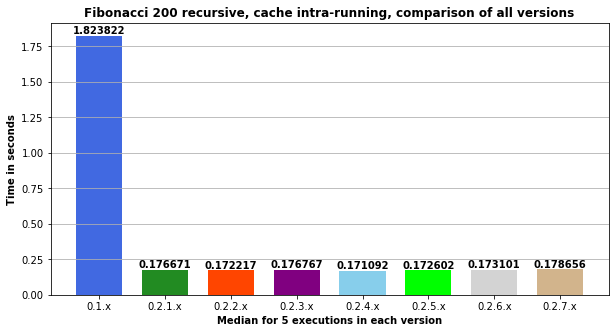

In [127]:
import matplotlib.pyplot as plt

versions = ["0.1.x", "0.2.1.x", "0.2.2.x", "0.2.3.x", "0.2.4.x", "0.2.5.x", "0.2.6.x", "0.2.7.x"]

plt.figure(figsize = (10, 5))
plt.bar(versions, intra, color =['royalblue', 'forestgreen', 'orangered', 'purple', 'skyblue', 'lime', 'lightgrey', 'tan'], width = 0.7)
plt.grid(axis='y')

for index, datas in enumerate(intra):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Median for 5 executions in each version", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Fibonacci 200 recursive, cache intra-running, comparison of all versions", fontweight='bold')
plt.savefig('compare_median_intra.png')
plt.show()

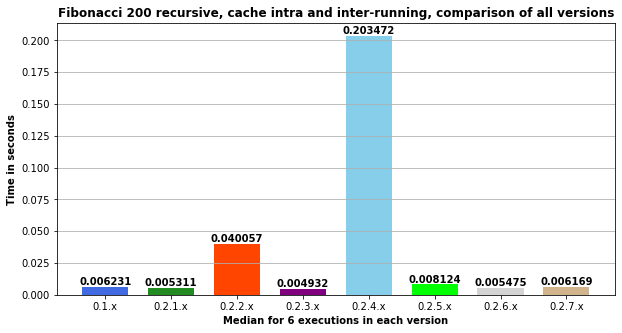

In [128]:
import matplotlib.pyplot as plt

versions = ["0.1.x", "0.2.1.x", "0.2.2.x", "0.2.3.x", "0.2.4.x", "0.2.5.x", "0.2.6.x", "0.2.7.x"]

plt.figure(figsize = (10, 5))
plt.bar(versions, intra_inter, color =['royalblue', 'forestgreen', 'orangered', 'purple', 'skyblue', 'lime', 'lightgrey', 'tan'], width = 0.7)
plt.grid(axis='y')

for index, datas in enumerate(intra_inter):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Median for 6 executions in each version", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Fibonacci 200 recursive, cache intra and inter-running, comparison of all versions", fontweight='bold')
plt.savefig('compare_median_intra_inter.png')
plt.show()

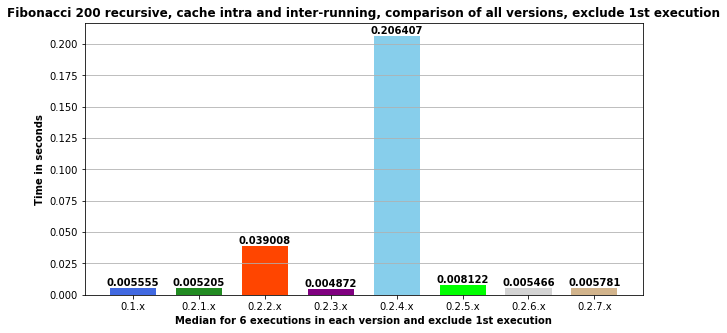

In [129]:
import matplotlib.pyplot as plt

versions = ["0.1.x", "0.2.1.x", "0.2.2.x", "0.2.3.x", "0.2.4.x", "0.2.5.x", "0.2.6.x", "0.2.7.x"]

plt.figure(figsize = (10, 5))
plt.bar(versions, intra_inter_less_1st, color =['royalblue', 'forestgreen', 'orangered', 'purple', 'skyblue', 'lime', 'lightgrey', 'tan'], width = 0.7)
plt.grid(axis='y')

for index, datas in enumerate(intra_inter_less_1st):
  plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Median for 6 executions in each version and exclude 1st execution", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Fibonacci 200 recursive, cache intra and inter-running, comparison of all versions, exclude 1st execution", fontweight='bold')
plt.savefig('compare_median_intra_inter_less_1st.png')
plt.show()